<a href="https://colab.research.google.com/github/sharifkaiser/DL_colab/blob/master/fashion_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link from where this code is taken: https://www.youtube.com/watch?v=AACPaoDsd50

In [ ]:
from __future__ import absolute_import, print_function, division
import pathlib

import numpy as np

# Always import matplotlib like this
# ref: https://stackoverflow.com/questions/45150238/error-with-matplotlib-show-module-matplotlib-has-no-attribute-show/45150262
import matplotlib.pyplot as plt



In [ ]:
try:
  # Always use this format while importing tensor flow. It compels to load version 2.x.
  ''' Otherwise there is a chance that tensor flow version is 1.x and later it automatically 
      upgrade to 2.x and there will be problems
  '''
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# This block is for seeing what our imported data looks like (for sequential .shape calls, only the last statement works!)
train_images.shape  # get the current shape of an array
test_images.shape

(10000, 28, 28)

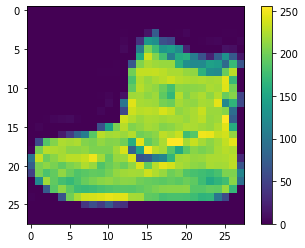

In [ ]:
# How to draw an image
# ref: https://matplotlib.org/3.1.1/tutorials/introductory/images.html#plotting-numpy-arrays-as-images
plt.imshow(train_images[0])
plt.colorbar()  # This prints a color bar (pixel value range) to the right side of the image

In [ ]:
# Preprocessing, or normalizing (pixel value between 0 and 1 instead of 0 and 255)
# Normalizing is a common technique for machine learning
train_images = train_images / 255.0
test_images = test_images / 255.0

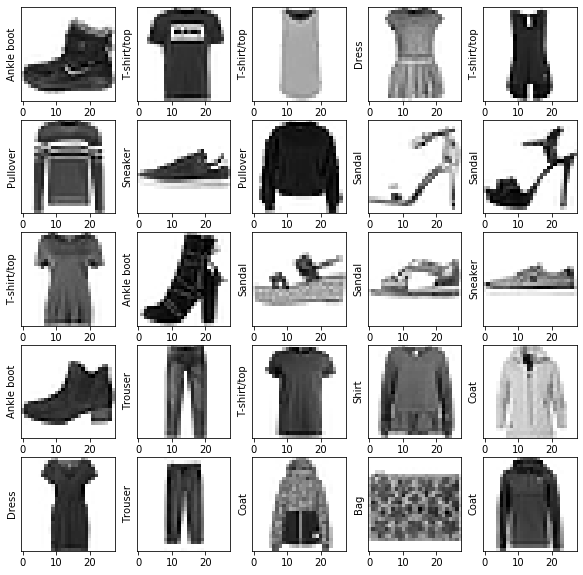

In [ ]:
# Display 1st 25 images from training set
plt.figure(figsize=(10,10)) # figure() creates a new figure, figsize is width and height of the figure
for i in range(25):
  # print('value of i {}'.format(i))
  # subplot function is used to plot two or more plots in one figure
  # first parameter,x=5: rows, 2nd parameter,x=5: columns, so it's a grid of x*y
  # usage: https://pythonspot.com/matplotlib-subplot/
  # 3rd param always starts form 1 and ends at x*y
  plt.subplot(5, 5, i+1)

  # ticks are pixel scaling in the image(in this case, for each subplot 28*28 pixels)
  # xticks means horizontal ticks and yticks means vertical ticks
  # if we do eliminate these 2 lines plot.xticks and plot.xticks, then by default the pixel numbering will be shown (see text below)
  ''' ideally xtick or ytick takes 3 params (start, end, steps) e.g. xtick(0,5,1) divides x axis of the plot/figure
      into 10 portions (just like graph) where every portion is 1 unit, scale starts at 0 and ends at 5
  '''
  # Here, both xticks and yticks has param [] which means pixel scaling will not be shown for horizontal
  #plt.xticks([])
  plt.yticks([])
  plt.grid(False) # we do not need grids
  plt.imshow(train_images[i], cmap=plt.cm.binary)  # first param, the actual image, cmap means colormap, always use binary
  plt.ylabel(class_names[train_labels[i]])
plt.show()  # Display the fig and return to python prompt


How does image look if xtick and ytick are not called with empty array []
e.g. if the above code was like this:

```
# plt.xticks([])
  plt.yticks([])
```
Then the images would look like following:


![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAj0AAAJNCAYAAADas8TAAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydebxWVbnHn+2sTMI5DIfxMIpMIoIJ%0A10RTVCiFzG5qpuWttLRMKyM1U/PmRdPy1jWzFDRTw5xxShFFRZBBQOZ5Hg8g4oz63j84PPzWw7uW%0A+5zzDvu8+/f9fPz47LPXu/d697PXehfPtKJMJiOEEEIIIaXOPsXuACGEEEJIIeCihxBCCCGpgIse%0AQgghhKQCLnoIIYQQkgq46CGEEEJIKuCihxBCCCGpYL+aNC4vL89UVlbmqSu14+OPP1Z59erVzrn9%0A99//cz8jIlJRUaFygwYNcti7urNixQqpqqqKcn3dpOjyvffeU3nt2rUqf/bZZ067Aw88MOs5q8v9%0A9tvzSrdv3z7r54vJ9OnTqzKZTPNcX7dY+vzwww+d4507d6p8wAEHqIx6ERHZZ589/96KIv/rjbrG%0Ae9lSGwcddJDK++677+d1OyeU+thMGnZ+x3cAx3ptycfYLJYu7fjYunWryjiOmjRp4rQ75JBDanz9%0Ad955R2U7b5eVlcW6Xq4J6bJGi57KykqZNm1abnpVA6wCcZJcsWKFyj/96U+ddi1atMj6mXXr1jnt%0ARo4cqfIxxxyjslUgXiM0UeeS/v375+W6xdKl5fXXX1f56quvVvmjjz5y2nXq1EnlHTt2qLxq1Sqn%0AXfPme97zP/7xjyp37dq17p3NAVEUrczHdYulz4ULFzrHGzZsULlt27Yqo15E3EWob0ErIvLBBx+o%0APH/+fJU/+eQTp91hhx2mctOmTWP1va6U+tiMC87PqD9c2Fpw/rQ6933uxz/+sXOMn/vTn/7kvVcN%0A+pTzsVksXdrxcf/996u8YMEClYcOHeq069u3r8r4rOxzw/n5+eefVxnHq4jIueee670G4nuHRGr3%0Aj5iQLuneIoQQQkgqqJGlp1iErCqPP/64yo899phzrkePHiq//fbbWWURd9X6zDPPqBxamSJx/6VC%0A9gb/JbBt2zaVrZsRLUJokkW3hojIsmXLVB4+fLjK8+bNq3tniYiIbNq0SWW07Ii4+kB3BFpdRdyx%0A+o9//ENla5G7+eabs97r4IMPdtrNnj1b5S9+8YsqcyzmH5yf8V/ldl7EY3R3Wh0tXbpU5QceeEDl%0ANWvWOO3QNf7oo48657761a96r1/fQCsIPms7p11//fUq4zMUcd1MOEaffvpppx2Gepx++ukqW/c0%0AWo6Qxo0bO8d//vOfVR4wYIDKl156qdOuc+fOKufbPV2/3wZCCCGEkJhw0UMIIYSQVMBFDyGEEEJS%0AQcFjenz+ScuWLVtUfu2115xzmzdvzvqZCy64wDn+5z//qTJm/HzpS19y2n33u99V+ZVXXlHZpvP1%0A7t07a9+tzzjud0wjNsUZYz0+/fRTlW3GHmYC4Tnr/8UyBUz7zQ+YoWHffXzmmL7+/vvvO+0OPfRQ%0AlZ988kmVr7rqKqcdZqF06NBBZUyHF3HnBIzRs7E/pHDYDCKrs93cdNNNzvFLL72k8nXXXafykCFD%0AnHb4u1BVVeWcu+2221S28SNJB+dBEXeOwzimK664wmmHz7tdu3bOOd/v1RFHHOG9N/4W2visNm3a%0AqIzxPrbvmAKPmbY///nPnXaoo8GDBzvn4mbfxYWWHkIIIYSkAi56CCGEEJIKCu7eQjMbmsnRpCki%0AMmfOHJUxlVlEpEuXLipj0bNBgwY57dD8ifeyaXWY3oemtJdfftlph+nsaGrt06eP086m95E9rFzp%0A1oxav369yuiasmZS6+7ajXUfoksSK4XadFd0l5GagWPJvuvbt29XuVu3birjeBYR6d69u8qjR4/O%0A+ncR1ySO7uW33nrLaYfvB7rV6N7KP/jscdxadxa+N+i2Qn2JuGnUWHHdhjn86Ec/UhnTtUXc8IhJ%0AkyapbH8jkkjIhXPvvfeqbN2HWJTTFnf16ejdd9/13hvb2XkWfyexH3aeRtcczs1W5xiKYt1buS45%0AQEsPIYQQQlIBFz2EEEIISQVF9cOgqc5md5SXl6ts3VFoNsVsILun1q9+9SuVMbrfbkSK+wdhhgju%0A5yPiRs5PmTJFZes6wUqWxMXqCM2f6DL8+9//7rTzuaMWLVrkHN9yyy0q33nnnSrb7A66t2oPmqZt%0A5Wzc2BCxYxjdFuedd57Ky5cvd9rZDMrdYDamiFtlFucSe1+Se3yVlqdOneq0u/DCC1X+/e9/r7J1%0AZyDoErP77OE8/oUvfMF7DdyXqz64t0IZvxhiYUMA8LfQbrCMYwJ1ZN1ReE18vtbFZLO5sn3GtkPZ%0Aup1xlwRb5b1Vq1ZZ71VbaOkhhBBCSCrgoocQQgghqYCLHkIIIYSkgoLH9GD8DMZjnHzyyU47jA2w%0A1SUXLFigMu4K26xZM6fdihUrVMbKvy1btnTaderUSWXcQdpW9N24cWPWa8yaNctpd9xxx6mMlWfJ%0A3imSGHMxbNgwlXF3Xgv6pK1vGeND7rnnHpXxnRER6du3b8weE0soJRyPlyxZojKWJhBx3wOMiUPf%0AvohIv379VMb5wsYsYJ9sui7JLTbdGOM4nnvuOZXvvvtup92MGTNqfC+M6cJ4S4sd3xg/hPd9/PHH%0AnXbDhw+vcZ8KjZ0zfeBcaMcbprPjb2vDhg2ddqhLjJvD2CoRN4YOsbG5qD/cSd2WocHP2ThNxvQQ%0AQgghhNQCLnoIIYQQkgoK7t5ClxOa3ObPn++0Q7eVNdW1bt1aZay6a9Nn0SzYo0cPlTH13B6juwXN%0A8yL+zdOsuRe/y8CBA4XsYd68ec4xmkmx0rZ1X2AJA7tpKYLlDNB0i65JUjcw3RzHhIirTxwXobIT%0A6I4qKytz2uFGopjKi3OHiGsut+nsJLfYtGRk8uTJKt94443edmvXrlXZpk3j+Mb53Vb/xo1KV69e%0A7ZzDe2PFfKwYXl+YOXOmyvhbZZ8HhmacddZZzjn8/cO51P5m4m8XpqnbduiOwrnVjnOsoo19R71a%0AQuEiuYCWHkIIIYSkAi56CCGEEJIKiurews1CLSETtXVP+UAXCVb+tRHmGJmOpnbrYkGTLJr4beVm%0AzFCje8vFVhs96qijVH722WdVthk4cc3STz75pMrHH3+8yraaK6k96Layrgk0iaNss7xwbPmqu4q4%0A4xbdKuj+FnHN6nZTW1J3cFNJ61bBsYWV6m1GFbpBcP607wbqHNtZcB63LpDf/va3Kj/44IMq2/em%0APoCbcfs2XhZxwzmsmxh/M0888USV7VjB+Rl/1+xvNWbBdezYUWXMhBYROe2001TGCvk4T4u4Wc42%0ABCLX0NJDCCGEkFTARQ8hhBBCUgEXPYQQQghJBQWP6UH/Laaj2hS2rl27qow+XtsWU1dt+izGBeHu%0AzbbCI6ZIor/a+q6PPPJIle+//36V0acpsncFabIHrNgq4lbKxrTT9u3bO+18VYBtuxdffFFljAF5%0A8803a9ljEsLu9IwxAfj8Q7s5Y7yIjfnCMYjzgI3rw3RdW0KC5BdfCYkf/vCHzvExxxyj8kUXXaSy%0ALUmC8Vm+90TEjVvByt0WTN9+4IEHvO2SSlVVlcpY6sGOPRwTtrI5/jZeeeWVKvfv399ph9XRMZ7K%0AVm7G324sU2F3McCx+PLLL6tsq0zj77h9H3INLT2EEEIISQVc9BBCCCEkFRTcvYWpyGg+W7p0qdMO%0AXVhoFhVxXSJ2IzSkUaNGKmOKrDV/Y7ocmgy7devmtLvvvvtUfv3111XGtDwRkS1btnj7lHaseRnN%0Arj179lTZbmiHrg3UkU13Rb2gSyv0npCaga4q67ZCd5R1RyDWZR0HTFG2Y9ia+knNsbq0rkYfOAZH%0AjBih8he/+EXvZzAEAEuBiLi6xBAFG76AJRGs+wWJu2FnUsHngy5jm86Pm3valHAE3WBYYkDEfaY4%0Axuy7gO1QX48++qjTrm3btirj+LVzA14/bkma2kJLDyGEEEJSARc9hBBCCEkFXPQQQgghJBXkPaYH%0A0+1EXH9dy5YtVX7llVecduj/szEzWKYa0xutjxNTKTG+B/2RIq7feN26dSpjeqCIW7J7yJAhKltf%0AM2N6/GA8lgXL2dutPXCrAvT/2tifZcuWqYz+79DO0KRm+LZ3qS04HkNl9hG7dQW+E7noUxqJG8Nj%0Awfnu7rvvVhm3fxBx523c+dzG42A8J8aVYMyKiPtbYudqJJTmXR/A52ufAYK/mTbtu0uXLlmvYedP%0A/A0NjUs8xt9Zu8UTlorB2C+7zRDey5ZACG0NVRto6SGEEEJIKuCihxBCCCGpIO/uLbs7NqYOt27d%0AWmW7s+rpp5+usjVJ4jWw8qRNMUfTKJr7bBVfNJXjLrx2p1p0keB9sZKwiGsitGZ461oje+jdu7fK%0Aod2VQ1VasfwAyQ8hFwG6SELuEt84sPpEMzp+JrQzO8dY7gk9U5x3cU7/85//7LQbN26cyn/9619V%0AtmUnEHRVhlzUcavgW/dLfQB/7+K6tzB0RMQdi+g+smMUfzOx/IQd8+gyxDGKYST2Xoh1QaMLy7rS%0AMOTE7n5QGzg7EEIIISQVcNFDCCGEkFSQd/dWaENCzHqyZjA0f9nNSDGCGys+hjakwwh4a07FipfY%0ADt0tIq758Pjjj1d5w4YNTjvc0DRuNgpxN53Dje9E/NkZVud2M1mSe0KVlvF9xzEcGgfoqgq5UXxV%0AYC21zUIiLnHnLpzH0dVlXSwDBw5U+W9/+5vK1tWBbizUJc4PIu578/DDDzvnrr76apVx7jj//PM9%0A3yI52IrE6OpHndgxgHOmdfeFxmwc7L2wH6gHm5Xl2yTYZmGhW826rvE3me4tQgghhJCYcNFDCCGE%0AkFTARQ8hhBBCUkHeY3psmiH67tDHZ1OU0WfYoUMH59zcuXNVHjBggMpY0VfEjcHB2B+76y6m1ffo%0A0UNlGxuwaNEilU866SSVbcwR+rJZHTY+WBnb+nV9u6zb9yYXPl/iEtp9244R1Fuu3/1Q1eX6WGk3%0A6eDzxudr467mzJmj8vPPP6/y6NGjnXY4z/bt21dlG8OCusWKwbYdpkc//fTTzrkrrrhCZYzpyUVF%0A33yzceNG59gXG7dp0yan3W9+8xuVJ0+e7JzDeRKfB/4eW/Bedg7A9wGvZ+djm8LuI/R+5XqHA1p6%0ACCGEEJIKuOghhBBCSCrIu3sLqzqKuGYsNJn179/faYduihkzZjjnDj/8cJWnTp2qsk1XRnMopqnb%0A9D2scol9QneWiJvCjiY3u+EopsCT+GA1V2vS9G04GroGyQ3WZB16/iGTeC4JubPsnEPqTkjnOP/9%0A9Kc/VXnmzJlOu4kTJ6qMbiZ0a4u4Li10v4SqrXft2tU5njVrlsoYAmFTqpPo7rLuLXz2+DtmwzRw%0AM2f7TNEF5aumLOKOq5DOcT7G69lQDxyLRx11lMqLFy922llXHWK/Z12hpYcQQgghqYCLHkIIIYSk%0AgoK7t9B0iZuAVlZWOu369eun8sqVK51z6J4KVT/GdlVVVSpbMylWr0TznK0AOmTIEJVfffVVlXFD%0ANBGRESNGCKk5zZo1UzlUARSxWV6sxpt7bIZHyH0Ud8NRH3E3C7XZW6FKtSQeoSy9kKsSqyHjvNil%0ASxenHbrBcG4OZWqiO8fqFav4h+Z+37WTinXt+zbatd8R50/cpFTE78YL6dyXMSvizgmNGzfO+nd7%0A3xUrVqgcqjpt+2o3La8rtPQQQgghJBVw0UMIIYSQVMBFDyGEEEJSQd5jetDPKOL67rZt26by22+/%0A7bTDSs52B3b0BzZv3lxlm9pWXl6uMvonQ/7OrVu3qoy+SnuMafRnnXWW086msJN4YAxV3F2BbTvG%0A9OQem+YbivXA+IO4MSFx43ji3hfjD2y8SNx7EffZheK4cAzi3Pfaa6857bA0SMOGDVW28zHO6fju%0A2fkd520bB2JjRHdTH+YHm/aN4C4D+AxFRBo0aKCynRcxNioUq4PjKhSfh7/jeM7qAXWL7ezuCZj2%0Abn8/8TvnAs4AhBBCCEkFXPQQQgghJBXk3b1lK0OiiStk0gqZ1tAkh64ua8pGVxW62WyFWTShojkO%0ATYIirumuZ8+e4iPXKXZpAd+VkDsEz1mzez6rAKcVO14QO+ZwbPo2Sqwtca+B7ejeik9o89gQ6Jbu%0A3r27ytYtitfD+d6mkeMcjO+TLTWCY99W46+oqMja1/qgfyyvIuI+H3T12N+nhQsX1vheoQ1H8Zwd%0Ae6hLbGd/x/G3sH379ipbNxjqJd86Sv4bQAghhBCSA7joIYQQQkgqyLt7y0Zeoyn06aefVhnNoiIi%0AnTt3ztpOROSYY45ReenSpSrbCqC4YShmh1kzKWYF4DlrPvRlgKEbTcQ13dnqmmVlZUKygxU7rck7%0AbpVdmwVI6k5NzM0h15KvXQi8RqiaLp7Dz9j5x2Zkkppz1113OccjR45UedCgQSrbOX3z5s0qY1iC%0AdXVg2ANu3mzn7UaNGqkcN2O2PmRv2fAIzGRGV5J17ePvXcjtj5lddl71uaRDG5OiLq2O0FWH97W/%0ArfgbHHKn5wJaegghhBCSCrjoIYQQQkgq4KKHEEIIIakg7zE91g+PvjtMK7T+31mzZqlsdztHPz36%0AGm2KJPodsVql9U/i9dq2bavy3LlznXaDBw9WuVu3biqHqlDifUmY9evXq2zjSHyxItYnjXFBJDfY%0AZxw3vdRX3VXEH6sTt1SBBfuBMRC22m8aY3pCO9CHKi37YqiWLFniHA8bNkxlrIRsY7owHuWggw5S%0A2cbhYZ9+8pOfqGzjdsaOHauy3bW7PmPfWd/uBDZebcOGDSpb3fnic6yO8BzqyOKLEcK+2mtgrJKN%0AbcXvFSqDkQto6SGEEEJIKuCihxBCCCGpIO/uLUyjE3HNXYsXL1b5+9//vtMOzdArV670Xh9NgdbE%0AiWZS3JzNVqFE0zua6qzbypcKa9PSjz76aJXXrVvnnOvUqVOWb0FE3HRHm7aJegmlnYbSmkntsBv+%0AJj3tF8d9rk3j9QUcL/g8Qu4sy5gxY1S+7rrrVB44cKDTrn///irPnz9fZbtxJs6n6Mo+++yznXYX%0AXHBBrP499dRTKsetHl0fiLvZsg3nwHFqU8J9Lq24FcvtmMfrYYq53RQWN4/FDcateysUppLrOZ2W%0AHkIIIYSkAi56CCGEEJIK8u7esuYzrKKJ5k9rwsJKy02aNHHO+ap5hiLWsRpoixYtvO1CFX3R7Ni1%0Aa1eVX3vtNacdmgJthD3xE3r2vuwDa4611bFJ3bHvsK/6sYirj9CmwUgoywvBc6ENEBFrKi8lQs/N%0A58aym1IedthhKlu3yr333pv1GqGMSXT12z6hS+uGG25Q+bjjjst6n88DQxZKKXvLhl/ErXKO77r9%0ALUTd4hgNjSPUs51nUbf4GTuHt2zZMmtfbdVlvJd9d+O6++JCSw8hhBBCUgEXPYQQQghJBVz0EEII%0AISQVFDymB/1zGKtjfYGYim7T4HDnVkwBt5UsMe0Zd+61fn6fz9Cm1aHf+JRTTlH5rbfe8vY97u6/%0AaQXjulDP1q/rSz22cQN4PXz3arJTOHGxYxjj6EIxBqHYAV+VYFvR1RcjFLqeL96g1AjFP7366qsq%0AYwXlG2+80WmHJUV69+7tnLviiitUxrgdW5EZz2E8Csbc2OuF4nh8lbfjxi3Vd+zvE35vHA/4mybi%0AxvHY+c4XnxOqco6fsfMvjtNQzA1+F0yjt7/pofk517uu85eAEEIIIamAix5CCCGEpIK82wet2QpN%0AkliB127MuWnTJpWtWRPdYvg5WxkZ26EbzLrSsPqzz5QoIrJmzRqVcbNUa47ETfdKKZUyHyxfvlxl%0AnylUxO8OsSZudG/htTt37lz3zqYUa9q2lcoRX3qtHcNoikfzuHVHxXVP4fXR7J9r03hSwflSRGTG%0AjBkq49z3ta99zWk3ceJElW0pj0mTJqm8bNkylUMuERy3uEGziMhXvvIV7+cQX4V8O9YxdCAtpUHw%0A2dvvjM8tlBIe+o3zhRHYv+P4xXnb/o5jKEp5ebnKO3bscNqFxrltW1do6SGEEEJIKuCihxBCCCGp%0AgIseQgghhKSCgqesow8R0xtt6W305WLMjYjI2rVrVUafoU1ZR98l+gXtvdAPjf5J60PGa6DPHHeP%0AFXFjCrD0usjeaaFpB7cbQf0ddNBBTjv0KYdiClB/uOMzY3pyR222ioi7DYWdL3znQmXxk74LfF0Y%0AN26cyhibaOc+PJ42bZrKNsbw8MMPV9nGgaxevVplHFdWR1jaA+ftSy65xPMt4hOK38OUeBvThITi%0AgpJIs2bNnGP8jcM42C5dujjtUF+tWrVyzqHO8HnYseJrZ8ebL8YyNH7x9/Okk05y2t1///1Z72uv%0Anwto6SGEEEJIKuCihxBCCCGpIO+2PtzdXMTdBXvChAkq33LLLd7PoXlPxN2pHbG7sSOYSmfNZWhO%0Aw3OY/izimur69Omj8qpVq5x2aUmTzQUvvfRSrHY+l5bdTRiZO3euynHTZcne2PfZuh4RdB+g6dzq%0AyZfOHtphGavAhlyc+Jlcp7smCay6bN1WGzZsUBldIiFXgb2GL424devWzjG60q699lrv9WtTIT2k%0AZ3ynQu3qG7169XKOx44dqzKWQ/nFL37htDv11FNVtu4tX5XyUKo4jntb/Rk/h/OBDR3Bc/g7PmLE%0ACKfd008/nfW+Iu53zgW09BBCCCEkFXDRQwghhJBUkHf31jnnnOMco+nq3HPPVblly5ZOOzSnYWVd%0AEbfyMrqgbIVKrKCM2TvWBIeur9DGpGh2xCqnzzzzjPd6trIwcUEdhTYcRdcG6u/DDz902qE7A/Vi%0ATcEkPjZLZN26dSrb54+6wcrNVp++LC/rBsNzOHdYs7wd07tp165d1r/XV9BNi/MRZr+IuBlA6Oqy%0AWV44l9pK21jxGDOl5s2b57S7+OKLVe7Xr5+3776NLuNmA1ribnxb37DfGX9PMOzDusHw+aLORdxx%0AGsqExeeIv4UhPfg2BRZxdYTze5s2bZx2+L2s+zzXrktaegghhBCSCrjoIYQQQkgq4KKHEEIIIamg%0A4OUp0U9o43gQjMGpbTXd2qRI1gabHkji88gjj6g8cuRIlWfNmuW0w12eMZ6qe/fuTjuMN7jgggty%0A1s80gxV37fH27dudc5gujj58G3ODYxNjDGw1VvTnY4yJjT/Bqu2hlPpSAlN5r7zySm+7lStXqoyV%0A5EVE5syZozLGaom4MY34TH/961877fr27RuvwwC+DzYdGsFYPsvXv/51lW2FX6S+Vei2u91jiZa2%0AbduqbHc0x/is2uIbl3b8YnwdxtLa+Bv83cX+YoyYiMiXvvQlle172KFDh1h9jwstPYQQQghJBVz0%0AEEIIISQVRDVJB4uiaLOIvCciVZ/XtgCUS/H7UYg+dMhkMs1zfdFqXa6U9DzHONR3fXJsFrYPHJuF%0Ao17qM2G6FElGP4qqyxotekREoiialslk+uekW3UgCf1IQh/qShK+QxL6kKR+1Jak9D8J/UhCH+pK%0AEr5DEvqQpH7UlqT0Pwn9KHYf6N4ihBBCSCrgoocQQgghqaA2i547c96L2pGEfiShD3UlCd8hCX0Q%0ASU4/aktS+p+EfiShD3UlCd8hCX0QSU4/aktS+p+EfhS1DzWO6SGEEEIIqY/QvUUIIYSQVFCjRU8U%0ARadGUbQwiqIlURSN/PxP5IYoiu6OomhTFEVz4G/Noih6PoqixdX/b5rnPrSLomhCFEXzoiiaG0XR%0ApcXoR66gLktHlyLUZynpk7osHV2KFEefSdBl9T2Tp89MJhPrPxHZV0SWikgnETlARGaJSI+4n6/L%0AfyJynIj0E5E58LebRGRktTxSREbluQ8VItKvWm4kIotEpEeh+5Gj70Jdloguqc/S0id1WTq6LKY+%0Ak6DLpOqzJp0fKCLPwfEvReSXBXx5Ko0CF4pIBTzYhYXqS/U9HxeRIcXuRy37Tl2WiC6pz9LSJ3VZ%0AOrostj6Tpsuk6LMm7q02IrIajtdU/61YtMxkMuur5Q0i4t+9NMdEUVQpIkeKyJRi9qMOUJfVlIAu%0ARahPpQT0SV1WUwK6FEmWPov6DJOiz5IIZM7sWi4WJA0tiqKGIvKwiPwkk8m8U6x+lCrUZWlBfZYO%0A1GXpUOhnmCR91mTRs1ZE2sFx2+q/FYuNURRViIhU/39Tvm8YRdH+sktx/8hkMo8Uqx85gLosHV2K%0AUJ+lpE/qsnR0KZIsfRblGSZNnzVZ9EwVka5RFHWMougAETlLRJ7IT7di8YSInF8tny+7fIV5I4qi%0ASETuEpH5mUzm1mL1I0dQl6WjSxHqs5T0SV2Wji5FkqXPgj/DROqzhkFIw2RX9PVSEbmqgMFPD4jI%0AehHZKbt8ov8lImUiMl5EFovICyLSLM99OFZ2meBmi8jM6v+GFbofOfw+1GWJ6JL6LC19Upelo8ti%0A6TMJukyqPlmRmRBCCCGpoCQCmQkhhBBCPg8uegghhBCSCrjoIYQQQkgq2K8mjcvLyzOVlZV56grJ%0AxooVK6SqqirK9XWpy+Iwffr0qkwm0zzX16U+C099HJs2hvP999/PKouI7Lvvvio3a9Ysp/1Yvny5%0AygcccIBzrnHjxio3atQop/cNkY+xWaxxaXX53nvvqdy8eW6nn82bN6t88MEHO+caNmyY03vFJaTL%0AGi16KisrZdq0abnpFYlF//7983Jd6rI4RFG0Mh/XpT4LT30cmzt37nSOZ86cqfLUqVOdc7jQOeus%0As3Laj29961sqt2njFig+9dRTVT7++OO91/jss89U3mefujst8jE2izUuUa8iIpMnT1b5oosuUhmf%0AoYj7HHGBvCvzPDt33nmnyt27d3fOHXfccTF7nFtCuqzRoocQQkjy8f1gjRo1ymn31FNPqbz//vs7%0A5+bOnavyDTfc4G2HloNNm/bUmJs1a5bTrm3btiq//fbbKg8cONBpN2PGDJVxQdS1a1enHTOP/Qwf%0APtw5xsUMLnpCi8XQQgfBd+qTTz5xzq1cmZd/49UJxvQQQgghJBVw0UMIIYSQVMBFDyGEEEJSAWN6%0ASFGJGyx32WWXqfzBBx+ofEAjDgEAACAASURBVMcdd3g/g/5l67uuTTzAp59+6r3GfvvtGUqY9UJI%0AkmjdurVz3KJFC5VtkHO/fv1U3r59u8o2M6hLly4qX3755SqfffbZ3nv37dtXZZuhhRlArVq1yvIt%0AdsGYHpe//e1vKm/YsME5V1ZWpjLq/MQTT3TatWzZUuWqqiqVbWzOpEmTVMZYra1btzrtnnzySZVP%0AO+208BcoELT0EEIIISQVcNFDCCGEkFRA9xbJO2iGtnUhfK6giooK5xgLmK1atUpla8Z97LHHVEaX%0AUy6g22pvrIshbpor8oc//EHlCy64wDmHhersu4P4Um9tCm2u34n6xrZt25xjfKete+vAAw9UuUOH%0ADirPmTPHaXfUUUepjDV2GjRo4LTr2LGjyqhLe18c01hUz7rBOB5dnnjiCZVRd/YY3fRPP/200+7j%0Ajz/Oeu2DDjrIOUY3GI4pW5zw0UcfVZnuLUIIIYSQAsJFDyGEEEJSQbptvaQgoMvDZkChiRqrtPbq%0A1ctpN2jQIJXLy8tV/vGPf+y0u/LKK1W+6qqrVLZuDsRXel3ENffavuPn0HyMLplSJ+TOwmdu3Uq4%0AX88bb7zhvd6ll16qckhPeIzuEruv07vvvqvyzTff7JzDDMFDDz1U5VCp/qTi0wtmYVmsS+Sjjz5S%0AGTOv7Fjq06dP1nN2jyfMxFq0aJHK1nWCn1u2bFnWz5O9Wbx4scqHHHKIcw7fYZyf7J5q6J7Cz9jx%0Ahhm0+J7Ycf7yyy/H6nshSf7oJYQQQgjJAVz0EEIIISQVcNFDCCGEkFTAmB6Sd9A3HEoZxjgKm/p4%0Ayy23qNyuXTuVsbqoiMiNN96YVY6LjRvAOB4b84DxIg0bNlTZ7i5dytS2Ku5zzz2nMqY2r1+/3mmH%0A7w7G0tiYFawSjPEMGHsgInLJJZeojPEiIiLf//73VcZ3sZTAcg8i7ni0cSCYIo6xQLbqLh7jeFm+%0AfLnT7oQTTlAZ4/KsjlDnU6ZMURnj+sjeYKq/jad65513VMY4RRtPhfrD8Wbj2DA2DrFlCvB9w9gf%0AO5cWElp6CCGEEJIKuOghhBBCSCqge4vkHTSN2rRv5KKLLlJ5woQJzjlMs0RXhnWD9ezZM2s7C7pl%0AQi4a7LtNRcd0+zZt2nivUcpYNxPqN+TKxA0LsequdZ1Mnz5d5QEDBnivh66ZDz/8UOUvf/nLTjs0%0Ay995553OOdShz61W37Euvfbt26sccjOhnq3r79lnn1V53LhxKuNGlCLueMHr7b///k47fG9eeeUV%0AlbGkgL1GGpk9e7ZzjO+9dR+hLvGcbYfvOurLlinAdjj2QnPp1KlTVT722GO97fJN6YxmQgghhJAA%0AXPQQQgghJBXQvUUKSmiTQHRHWddUZWWlyph9YE3y+Dk0f4c2q8TrWfMsmt4x+0DEzW7B7Ig0YZ8r%0AHqOulyxZ4rRbsWKFypj5Zp//6NGjVQ65t8aPH6/y7bffrrJ1xVx88cUq9+3b1zmHlZxR77nYVLWY%0ALFiwQGXrosUMRDvmbCbObsrKypzjjRs3qjx58mSVR4wY4bRD1ye6YrASu4jrcnvrrbeyfkZk78yj%0AtIFjQ8Stmm03ccV3Fsfbjh07nHboqsIxYOdZdHf53Ja2T//85z9VpnuLEEIIISTPcNFDCCGEkFTA%0ARQ8hhBBCUgFjekjewZiIUDzEE088obKtDovxBXgNGyOEMQvr1q3L2gcRN74Az9nrxT1nU63Tgk3n%0A9sVOzZ071zn2xczY+A6Mt9q2bZvK9913n9Purrvuynrf3/zmN87xaaed5u2rTZ3eja/MQm2rURca%0AjDezcTv4TtvngbrA2Cib5oxjFasu2/GCpQmw8jbGmIi4esCK6zieRUQ6deokaQZjtUTcODlbygPj%0ADxE7H+PnUK+2AjNeD+OCbGwjVoZOSumHZPSCEEIIISTPcNFDCCGEkFRA9xbJOdZMHjJrduvWTWXc%0A1LB79+5OOzTDogkWXR4irkkeXWI23RxTLtGFYk3yWB3WmvUxZXbhwoUqWzM8pm2WGtbF43P54MaR%0AIu6zw/cDXSAirol92LBhKlt94vtxyimnqIzuLEvINYcpv77NEetL6vq///1vlUOuKft9UJehkg++%0Aar9btmxx2qFLC9vZVHTr4tzNokWLnOO0u7eeeeYZ77mxY8c6x+eff77KuGGzTVlHNxbq1c6zWG0b%0ANzq19x06dKi3j8WClh5CCCGEpAIuegghhBCSCrjoIYQQQkgqqHFMz24/b2392Zj+GdqSoKqqKtY5%0A9CfasumHHXaYyrb8el37R2oHliIXEVm8eLHKmLpqd/XFcvkYg2PbYbn0Jk2aqBzaIR3jSGx6Mh7b%0Ae+ExxoA8/fTTTrvvfve7UqqE0r4xDsBuQ4HzBz5/qyeMj8I4IBubgnEg//M//xOr7xaM8cHrb968%0A2Wn3j3/8Q0Tc7ReSzGuvveY9h+PAxknh88AxZ2OhcIzgOLDbRKDOMY7H3hdjifBeDz74oNPu1FNP%0AFZIdu8UKgs/Upraj/lBHWDrAfg71ZUuNJBFaegghhBCSCrjoIYQQQkgqqLF7y+fW8qWqWncBpgDj%0ADro333yz0w53VJ4xY4ZzDl0daHazfcB0vF69eqlsTX94L7q06k4oRf3+++/3nkOTKaZVWtAcbt0c%0A+L5hCrx9N9A1hedsu1BqLX5P3AX+4Ycfdtqlyb2F4+f5559X2VZq9VU/tpVfcb7A523bDRkyJGaP%0A/eD78stf/lLlefPmOe12u2Ftum9SwWrK9h1G/dlzvl3n7fhGnftk2w/ftUVcnaNsd/pOO/a3FZ83%0Ahn2IuPMauirt7znqAt2T1rWPczDed+nSpU67wYMHZ+1DMcs90NJDCCGEkFTARQ8hhBBCUkHOKjL7%0AzFVonhRxTch9+vRRecyYMU47rCBpsySwwii6vpo1a+a0QxMcmtqfeuopp13Xrl1VvvHGG719R0Kb%0ADeKzCJkgfRsZ2nb1gbhZb1i5WMR9Vqg/NMHadpjtY/WArk/8DJrTs31uN77qu9mugcdourcbAdoq%0Aw/WBuJtp+txUIiIvvPCCynZs4rPD52PdZagPvJfN7uzZs2es/iKXXXaZc3zPPfeojC5vu1njhRde%0AKCJ7v8tJBedB66YIuRzQfYcVeENzGl7PZmUhqFe7CSrqGa9hXSdpJxRGsGrVKucYxx/+rtlsK5/b%0Ayt4LjzFreu3atd4+JaWCOS09hBBCCEkFXPQQQgghJBVw0UMIIYSQVFDrmB7rG8YYjFBVRkztnTRp%0AksoDBw70fqZly5bO8be+9a2ssgX9k1gl18ZYYD+uvfZala+66iqnHaZUx/VPhuJb6lvcjo3zwPiL%0AUAzIxIkTVbZxEBUVFSrjbuQ2bgD9/pj+bOOu0L+MKZdWX6E4EgSrRJeVlTnnMC7FV21WxC3NUF8I%0Avd+h+C2soIxzhH0mOF+gbm1MlY3t2o1NWT/99NOztrvvvvucY0xF79Chg3Pu+OOPz9pfW016dzqw%0AjfFKKv369VMZ5zoR9/niuy4i8sYbb6iMc2mXLl2cdhjzhOMxVM4AY+9C5QxQD6gfEsbG1uCYxTFm%0AywDgnInn7HyMMUIY37N+/fpa9rhw0NJDCCGEkFTARQ8hhBBCUkGN3FubN2+WO+64Q0T23hgQXT+Y%0Alo6bfoqIHH744SqjyWzcuHFOu5BrAmnatKnK6CoREWnVqpXKxxxzjMozZ8502p100kkqv/nmmyrb%0Ajfq6d++uMppqrXkWzb12Qzd0A6GJ15qWk4jVAz6DkKkfq2afeeaZzrlFixapjKZsu1lhaANaBPvh%0AS1+35zDd3Lpr0F1m+4AuFnTBWjfY6tWrY/W9vhBKlb3ttttURreQdYngBqGYXosuThHXRYLzSseO%0AHZ126BL52te+pvIjjzzitPvyl7+sMr4DIm5KNLppbOr17nkllK6fJPD9DlUwt2MO5ySc722Kuf3c%0AbkIlP9B1YtuhWxTHX32pgF0obEgBznE4VkRcNya69u28jdfAsRc3nKM+bMJLSw8hhBBCUgEXPYQQ%0AQghJBTVyb+3cuVMzF2wWALqW0OVk3QVXXnmlymjWthlVaFK2JrM1a9ZkPWfNn+h26ty5s8p2MzY0%0AtaLpfurUqU47NIejCbZJkybiw5rGMbMt5H7Z7S4JVbhMEiFTP7oFH3roIeccZvOhiyhUpRWxLgo0%0A46Je7fNF0zCa/O17iNkIIbM+uvBsZmN9yfLxETKjW9A9deqpp6qM417EfSa4uWxoM0t0t9gqyeii%0AnjVrlsqjR4922qGuf/KTnzjnOnXqlLXd1q1bnXa73TFJqTD7eeA4sO8mYscSjjmc323Gj6/KvNUl%0Aulwwy8+6NDEkAOfPuC5uEt6c1Zd1ao9xvNn3xmZj7sbOkUmElh5CCCGEpAIuegghhBCSCrjoIYQQ%0AQkgqqFFMT+vWrbVi8Q9/+EPnHMb4oO/VVuXEY/T52pgN9EmGKuYiNnYCfc3Tp0/3fs6307CNJUJ/%0ANcr2vqGUXl/lYuuDHT58uIiEdyquK76+4DPANrZ96Hv6OPnkk53j5s2bq4xxGps3b3baoQ8Z9Wpj%0AxvAaeM76pDFlGu9l9YB+bVvBF0siYNqt9XdjvEmSsFVWUZ/4DtQkduXSSy+N1Q7H++9+9zuVL774%0AYqfdkUcembUftkzEvHnzVMbd0s877zyn3ZgxY1S2evLFjdn3fncsV32J6cHSCqEd0rdt2+acw3d6%0A5cqVKtvSIBgLhDF1dt7G54hjx1bXRnDc2v6lndD7F4ojxJgpnAft53A+sPMnxrxhP+z7lURo6SGE%0AEEJIKuCihxBCCCGpoNYbjt5+++3OMZou58+frzKml4u4KcFoorZuipDrBFOFQ5t22mrIcYjrsgmZ%0A9LZs2aKyNY2j+RdTOG1V0wsvvFBERPr37x+rP7Vh93eI6z4MmVPxe9nU1wcffFDl5cuXO+eGDBmi%0AMr431vWAqf7YX3sv1Dlew7oq0aTepk0blbG0gYj7vayOsB9oJrYlDDCdPUnEdcPaTT/RDWSvgc8E%0ATeK26i5+7txzz1X5rrvuctrhHIHP1bpEbr31VpWtSwvBz9l3J2412t1Vgmvj3i0GOAfbcYU6si4R%0A1LMvldl+Dp+JvZ7v3bDPEV366Eapjxv3JgVfqYJQ1WzUg/2NwPcB9RfaeDop1I9RSwghhBBSR7jo%0AIYQQQkgqqLV7y4Lmrh49emSVSTKxJklfNlvInG9dBciCBQtUthtFzp07V2U0tWJ1ZhG30if2w/YJ%0AMzzQpWVdUwMHDlQZv+/LL7/stMP+2u+Irlrf5oxJxrptfC4Hu0ll3Gv63CMhrrnmGuf4V7/6lcpY%0AGRmz/kRELrnkkljXxz7ZayD4TljT/u5r1JfsLXxPbXYiPg8bKoAblaILOO57Y9uhexJdJytWrHDa%0AoTsV3dohfaWRUKX0UMgChmOEwi/w3bDXQ537spqTCi09hBBCCEkFXPQQQgghJBVw0UMIIYSQVJCz%0AmB5Sfwml/dcGW/0aU/NtDA7GyWA/bEwPxnNg2rFNRccUZ4xDwAqwIm6cEabWXn/99U67n//85yrb%0AKuTPPfecZAPjEOoTvvRVq8+ysjKVKysrnXPo+6/Ne3XCCSc4x/h+YIzBI4884r0G6tNWWcbvaN/F%0AOBXKRfZ8r/oS04PjJVQ+we4mjzE9GBNnq2H7Yrfs88R5AHVkY8YwLgTfIfy8iFuFO42xozV5/7At%0AltfwVSG3n7FjBc+FxlsSoaWHEEIIIamAix5CCCGEpAK6t8herFq1Kqu8fv16px1Wd920aZPKtuqy%0ALw1SxDWhY+XYdevWOe3QhLpjxw6VrYm3W7duko3Jkyc7xz/4wQ9Uvummm7J+xmLN/2iGxxROmx5f%0AX0Cz98MPP6yydW9hu/vvv985h+6IuNVZUYd33323cw7dkFdffbXK+N7Ye4VKK4RSqn3Xq+/uLdxQ%0A144PTGe37ze6abFkxO6K1Lvx6Tm0ETOWdbBuVV/as3Ubv/LKKyqn0b0VIuRmwudry3CgezqUiu4b%0AYzUpb1EsaOkhhBBCSCrgoocQQgghqYDurZTy4YcfavbDbbfd5pxr166dygMGDFC5oqLCaYcVVjds%0A2KAymtNF3KrLNtsKTdu4Wag1jWMGCro2rDl19erVko2pU6c6x927d8/aLoQ1r/vM8KHq1PnE52bw%0AZVTZTTvPOecclTF7zl4XXR3jx493zp144okqo/vHbniIesfrjx492ml39NFHq2yz55C4riZ0zdjP%0AxL3Gbvdlkt1bOA7QVdyzZ0+nHbq30G0s4uostKEwPofQBr3ockFXOVZnFhEpLy9XGd9X69L0jXWy%0A97vp2+w15LbCOdjOx/gOhKqXJxFaegghhBCSCrjoIYQQQkgq4KKHEEIIIamAMT0pZcuWLZpuPGHC%0ABOdc69atVcZdx+3u4T6/LqY0i7j+e9wFXcSNI8BqsdY3jLEYGFszZ84cp92ZZ56p8r333itxCKUn%0AIzYN1Fd9NtcVruOQyWTUV2/76esP7gwvIjJ48GCVp0yZ4v087tT9l7/8xTmHMT2Ir9qziMiPfvQj%0AlW3M1z333JP1MzYWAfvoq+j7eaAOQ7tF14dd1jHVv1GjRipbPWCaekhHGNNhKyNjLB4+E/seVlVV%0AqYxxJTaWCJ893tdWk7a7s6eN0C7rqBMR/zO1cX1xY3VwDsCYrFC5iKSQ/B4SQgghhOQALnoIIYQQ%0Akgro3kopFRUV8otf/EJE3DRTEZFFixapjK4p63pAEzWaP20KKrazJvRmzZqpHDKNo6kVKwTbdPtL%0ALrlEshEyBcd1U9iUdXSdoFyMisxRFMXa7A/TzdFELeJuHvr66697r4Hfz5YnGDdunMrDhg1T2boi%0Abr75ZpWfffZZla+99lqnXadOnVSOW3U5BH4u7oajtlRDkt1au0HdNm/eXGXrzkBXB45FEZGmTZuq%0AjM8K3yF7jO4RrNgu4s4LOJbse4j3ClUPZsq6n9CmxzhXW7eVb04LjRW8BpYbSCq09BBCCCEkFXDR%0AQwghhJBUwEUPIYQQQlIBY3pSyj777KOprKFdxmfPnq3yiy++6JzD2JrdW1qI7O3L9+2QLuL6htFn%0Ab33IXbt2VXnhwoUqd+nSxdt3JBdxGDaWYcuWLSpj3NLKlSvrfK+asmPHDt0SYtSoUc45XxyLja9C%0AXWC8hE3fxlR3G7/1/e9/X+UOHTpkvbaIGxeEcTznn3++t0++7TRqAsavxd1lfdasWc653e933F3k%0AiwHGyeCzstuB4HewsX2oIxzDtnTFO++8k/UaNgYH44lwmxOrB3yn8Hp2K4QkP/9CEHp/sUyBBcdz%0AKHYS29n3xhcTiVsTWeKWBsk3tPQQQgghJBVw0UMIIYSQVED3FgnSp0+frHJNwLR3dAmJuOZrrLqM%0A6dMie++mXgx+9rOfOceY4ospov379y9Yn3Zz8MEHq36GDh3qnMNnjM8/tMNy7969nWsjaMK2qbF4%0AL3SfHXnkkU67AQMGeL6JS21cWqF2Z5xxhspt2rRxzqHbDs351oW326WahHfSB1ZaRkJ9ts8Nj0Pl%0AJPCcTYlHcHz7qjiLuGnPa9euVdlWEK8PO3rnk1AZjo4dOzrn8FnhuLTlArAdzgf2Wfveo5B7Kyml%0AHmjpIYQQQkgq4KKHEEIIIamA7i2Sd7Cira1uW5/ADDIRkRtvvLFIPdmb/fbbTyvvXnbZZUXuTe6o%0ATZZW6DOYkYQbrJYa6MZE2W4Wum7dOpVtdmLnzp1V3rBhg8roprKgy9S6uvAYsz1xg2MRkfnz56u8%0AZMkSlW2132JUPk8SNqMKs+XatWvnnEO3cyjrzbq7dmNdU3jv0KawCLO3CCGEEEIKCBc9hBBCCEkF%0AXPQQQgghJBUwpocQQkqMbt26qXzaaaepPGLECKfd5MmTVd68ebNzDlPTMQXeVm7GsgWYVm7jQzB+%0A6IQTTsjaV3sNjKOz7XAX+DRiK6oj/fr1c46POeYYlU8//XSVsZq2iGhcoIjIxo0bVT700EOddvg+%0ATJkyReVzzjnn87pddGjpIYQQQkgq4KKHEEIIIakgqsmmbVEUbRaR90SkKm89ik+5FL8fhehDh0wm%0A0/zzm9WMal2ulPQ8xzjUd31ybBa2DxybhaNe6jNhuhRJRj+KqssaLXpERKIompbJZApfZz+B/UhC%0AH+pKEr5DEvqQpH7UlqT0Pwn9SEIf6koSvkMS+pCkftSWpPQ/Cf0odh/o3iKEEEJIKuCihxBCCCGp%0AoDaLnjtz3ovakYR+JKEPdSUJ3yEJfRBJTj9qS1L6n4R+JKEPdSUJ3yEJfRBJTj9qS1L6n4R+FLUP%0ANY7pIYQQQgipj9C9RQghhJBUUKNFTxRFp0ZRtDCKoiVRFI3MV6ey3PfuKIo2RVE0B/7WLIqi56Mo%0AWlz9/7yW54yiqF0URROiKJoXRdHcKIouLUY/cgV1WTq6FKE+S0mf1GXp6FKkOPpMgi6r75k8fWYy%0AmVj/ici+IrJURDqJyAEiMktEesT9fF3+E5HjRKSfiMyBv90kIiOr5ZEiMirPfagQkX7VciMRWSQi%0APQrdjxx9F+qyRHRJfZaWPqnL0tFlMfWZBF0mVZ816fxAEXkOjn8pIr8s4MtTaRS4UEQq4MEuLFRf%0Aqu/5uIgMKXY/atl36rJEdEl9lpY+qcvS0WWx9Zk0XSZFnzVxb7URkdVwvKb6b8WiZSaTWV8tbxCR%0AloW6cRRFlSJypIhMKWY/6gB1WU0J6FKE+lRKQJ/UZTUloEuRZOmzqM8wKfosiUDmzK7lYkHS0KIo%0AaigiD4vITzKZjLNFbSH7UapQl6UF9Vk6UJelQ6GfYZL0WZNFz1oRaQfHbav/Viw2RlFUISJS/f9N%0A+b5hFEX7yy7F/SOTyTxSrH7kAOqydHQpQn2Wkj6py9LRpUiy9FmUZ5g0fdZk0TNVRLpGUdQxiqID%0AROQsEXkiP92KxRMicn61fL7s8hXmjSiKIhG5S0TmZzKZW4vVjxxBXZaOLkWoz1LSJ3VZOroUSZY+%0AC/4ME6nPGgYhDZNd0ddLReSqAgY/PSAi60Vkp+zyif6XiJSJyHgRWSwiL4hIszz34VjZZYKbLSIz%0Aq/8bVuh+5PD7UJclokvqs7T0SV2Wji6Lpc8k6DKp+mRFZkIIIYSkgpIIZCaEEEII+Ty46CGEEEJI%0AKuCihxBCCCGpYL+aNC4vL89UVlbmqSvxwTikXcHh2XnnnT3lAHbu3Knyvvvu67TbZ589a7/GjRvn%0Aoos5Y8WKFVJVVeX/krUkKbrctGlPpuL++++vMupEROTTTz9Veb/99sv6d/s5fDc++ugjp13z5s1r%0A2eO6MX369KpMJpPzmydFnxs2bFD5wAMPzCqLuDpEPdkYQ9QvnnvvvfecduXl5Vmvl09KfWz6wLlU%0AxB23yCeffOIco86TSD7GZtJ1acH5+IADDlDZzsf4G4pjOyk6DumyRj2srKyUadOm5aZXdQAHnW/A%0AiYg899xzKm/cuFHlQw891Gl3yCGHqHzSSSepHAryLtTE2r9//7xcNym6/N///V+VKyoqVG7YsKHT%0A7u2331a5WbNmKu/YscNp16BBA5VRRytXrnTaXXjhhbXscd2Iomjl57eqOXH1+dlnn2FfvO1q+37f%0AeOONKnfr1k3ljh07Ou1wkYJj2C5iUe/4IzplyhSn3be//W2V7QLLBz4Lkb0n9s+j1Memj/Xr1zvH%0AOG6RzZs3O8fF+odGXPIxNpOiSxxXuGCx4+3//u//VO7QoYPKdkzhb2inTp1UbtGiRd07mwNCuqR7%0AixBCCCGpIBm2qBris+786U9/co4HDRqk8imnnOK93r///W+Vx4wZozL+61EkbPkh8Xj//fed48su%0Au0zl448/XuX58+c77dDU2rRpU5W3bt3qtMN/xXTt2lXlxYsXO+3OPfdcldE6VIqgRQOtGXEtHdZK%0A9tBDD6n8+uuvO+fwX7WNGjVSGS2tIiIff/yxyh9++KHKaHUVcf/liP+6XLRokdNu9OjRKl9++eUq%0A23HfpEkTle33RUtSUsz0SQGtO2VlZc45dB2j5dVadvAdaNlyz1ZLdl4tlBU9TfgsPW+99ZbTDi21%0AqBcbHoAW2BCHH364yjh+O3fu7LT75je/qfKpp54a69q1hZYeQgghhKQCLnoIIYQQkgq46CGEEEJI%0AKqgXjutQ7MFNN92k8sknn+y069u3b6zr4+fGjx+v8pw5c5x2vXr1UtnnIyVh8PmK7Mpu2E3r1q29%0An8NYD4wLwiwgETfep0uXLlk/I+Lq9gtf+MLn9Lp0QD99KFvphz/8ocqvvvqqcw4zsVq1auWcO+GE%0AE1TGuKz27ds77dC/j5khdqxjvA+mqQ8dOtRphxl9mIHyl7/8xWl3xBFHqDxq1CjnHMYKxi2LkRb+%0A+te/qmxT1q+//vqs5yZPnuy0Gzt2rMq33rpn70k+3+KBcXcibtYszg8YgyfixmthLJzNBnv33XdV%0Axjl4wYIFTrtzzjmnJt2uE7T0EEIIISQVcNFDCCGEkFSQWPdWKH0U048x5e6KK67wXi9uocETTzxR%0A5fvuu89ph+4turRqx5o1a5xjNHlu375d5YMPPthph64NTDG3abGYMrt27VqVrSvHFjUsZeIW3UOX%0AFj67I4880mmH49FWRsZxMWDAAJXRzC0isnTpUpW3bNmisk1ZxwKHaIrHEgb2GkcddZTK+E7Zfhx3%0A3HHOuccee0xlplS74DuEVbdFXFcVFiS083b37t3z1Dvyefh+/9544w3n2DdXoJtZxN3tAPVsy8ng%0AWEE39te//nWnnXVX5xNaegghhBCSCrjoIYQQQkgqSKx7K+SOGjdunMpY0dcSd48uXyaW3SjuzTff%0AVBlN/jZina4vP6tWrXKO0fwZ0hFWBEW9WvcFur7QRWZdEuvWrYvZ4/qPLxPplVdecdq99NJLKqOb%0AF11RIq5L0e7J88EHH6hcVVWlsnVboQsKsXpCXeP3wGuLuGZ5W6UbwX2irGsOK7r/5je/yXrfbH1M%0AA+jSss8XN6nEZ2Xbq8jHCQAAIABJREFU4XPzVQkn+cH3zi5fvtw5Rr1gxpZ1J+NvHGbM2ixZ1C3O%0A76FsLZspZu9dV/i2EUIIISQVcNFDCCGEkFTARQ8hhBBCUkFiYnqs3zwU34G++H79+qlsY2vi7pTs%0A8ykfe+yxzjFWJcWYHsbwxGf69OnOcbt27VRu3LixytY3jLE6GB9iq8OiLvAaNrXd7i5cyvhiesaM%0AGeO0Q//+tm3bVLbpquj3t6noGEeF48qOEYzFCsV3+Ppu9Y6xRaFKsngNWz4Bq4VjTA9jTtySACiL%0AuM8ed7HHWB8RV8/4Ttl4L5J7bKXz3dgYS9w9Haum2/GGJWVwDrCxQ/g7jr/PgwcP9vY19NufCzia%0ACSGEEJIKuOghhBBCSCpIjHvLmt/QHD5p0iTn3JAhQ7Jeo7appdguVAka012xKnTXrl2ddkzH9GNT%0AzHGDO9SfNXFiKvTGjRtVLisrc9qhzlC25lk045Y6vndwxowZzjE+r3nz5qncpk0bpx2OEZtOinpC%0AfbZo0cJph/pA94gdw1iqAL/HQQcd5LTDz6H721b2njt3rsp2zsENUrEitf3+aQTdUfZ9wnlx/fr1%0AKluXJroa6d4qLHa87GbZsmXOsc+FjONQxB33OI7s+MWxePbZZ8fqa75LQvAXmRBCCCGpgIseQggh%0AhKSCxLi3QhlQs2fPdo4vuuiiGl8jLiHTGmZsTZs2TWXr3gpVk0476P4QcZ83uiJsVhCaxtFFUV5e%0A7rTr1KmTyug6sxlI9nNpAV1aCxcudM5h5g1mNtmqy+hStBu3olsSx6M1j+MYwc0LrcsJzfLoVrFj%0AzJedYt1bWFXduubQ9Tp27FiVQ1Xf0wLqKORaxHM2mxbHILoPmzVrlrN+kl3EDfVYsWKFc4z6w8/Y%0AsYLHOKfbkJCVK1eqbDcZ9fWX7i1CCCGEkBzARQ8hhBBCUgEXPYQQQghJBUWN6QmlduMOvXZHZQT9%0AxtavHzddHH2IoXgcjBHB2Ijhw4fX6r5pBONGRNzYHawCHNpp9+KLL1b51ltvddphejH6pzGGQMRf%0A9qDUue+++1QOxTlhqqkdfx07dlTZ+vpxjGBMj9Wnr5yAjQPxlZOwac54fWxnY3owNsXeC8ftY489%0ApjJjetxnFSongXOwjf3BuC6s/t27d++c9ZPsIlQCBscKlhgQceP1cBzZsYL4dlIXcecK3D3Bgvdi%0ARWZCCCGEkBzARQ8hhBBCUkFR3VshNxCmMYY2DkWzXS5S1kN9QteMTcFF8p1yV59Bc6eIyEsvvaQy%0AmlCtmxHdYE2bNvW2QzMpylZftsxAWvjXv/6lcqNGjZxz6GbCVPQOHTo47XCMWDM6Pmd0LVmTNX4O%0A+7F582bvvdD9ZlPlfW4w69bETRTRhW77O3HiREk76NbE1OM+ffo47dBdgvq3pQ5wfGNFe5J7Qu4t%0A3PS5bdu2TjvcpDlUIR/nCry2/f3Eefv6669X+de//rXTrpBlXmjpIYQQQkgq4KKHEEIIIamAix5C%0ACCGEpILEbEPxla98xTnG2A/r5x83bpzKlZWVKtudnDEGIBRn40tZ37Jli9MO/ZW4S/eoUaOcdujv%0AvPrqq733TSNHH320c4ypwYhNp27cuHHWdqHYKoztsD5u24+0sHr1apXjlv9v0KCBc4zP3D5/X8q6%0ABfWBso3fw+vb8Yjg53AemDlzptMOd5W28Qc2BmU3mOYu4n8XSw2M6cF4J/vccJwhds7FuJCQLknd%0ACcXIYEyPHb+oM9RzSJeh7WGwpMW1116rso3pwXZxt9CoLbT0EEIIISQVcNFDCCGEkFSQGPcWmt1F%0ARBYtWqQyVokUEbnyyitVRhM6pjKLuCmprVu39t4bzXOYSonpeyIiFRUVKqO597nnnnPaYWom3Vsu%0AgwcPdo7RvIpVgK2J02deD5ldsVKs3VXdVoYuZZYsWZL179aV5DOJ28q6+FytawPf/Q0bNnjvhWMV%0A9WnboasYse5Pn4va9g9TaOO6qSZMmOAc2wrspQqGFaD7wbq3cAzj+LO6Q3cqjnWSe2yldOS1117z%0AtvPpxVZk9pWRsZXXcVy++eab3j6FdmfINbT0EEIIISQVcNFDCCGEkFSQGPeWrQ6LZjGbBYJVVX1Z%0AICKuORVN8qHo8M6dO6tsTeiY3eHLWBARadWqlfdc2rGbC6I5HJ+3zaTBduiqCmULbN++XeWjjjqq%0Alj2u/2B1YXw+dlz53mnMVBQRadmypco2sxJdGpjJZSu64r3QJG7N7Xg9zCKzrmdfpt4JJ5zgtMPs%0ALet+QTce3sua5dPi3tq0aZPKoeraOLfiM7SuDtwM2G50SepOXBfRggULvOd8G3/aMAJsh/MIzrki%0AIqNHj1a5b9++3vvi9Wu7cXhcaOkhhBBCSCrgoocQQgghqYCLHkIIIYSkgsTE9NhUOfTrhXzveM6m%0A1aFPEj9j40AwfgTvG4oXwYqi69atc9p16tRJSDywei6+AzYl0uc3tnEp+DlMmT7ttNPq3tl6yj33%0A3KMyjgP77PB9x3TuQYMGOe1WrFihsk39940lO4ZxbOK4Cvnz8RrWz++r6oxlJkTCO0L77pvWHddD%0AcZAInsPna+fjQw45RGVfKQJSezDOxsbGzZkzR+W1a9eqHKrKHtI5Xh9Lw9gYuhEjRgR6vAeM6cl1%0ABWYLLT2EEEIISQVc9BBCCCEkFRTVvYWVjG0KY/v27VW2G/75NjsLgVVDQ6m6aNLDNE0RN4UTZWuO%0AS8uGhLkASwRgarQ1rWKKMurSukPQtYHm9K5du9a9s/UUTNfH9OuNGzc67dDlgCUkLrzwQqfdl7/8%0AZZWPO+445xyWHcBxFnJDIlafvurKNm0aWbp0qco///nPnXPbtm3zfg5N9lgxGr9vmsDxGKqC7it1%0AYEt+hMYtqTsht9AzzzyjMpacsG5GHG8+WcTVH74nf//732vQ4+JASw8hhBBCUgEXPYQQQghJBUV1%0Ab40aNUpla+4MmcYxe8e3EaWIa7pDc3poU0M8h9kLIq4ZD0231qxosxaIH6yuXFVVpbLVOT5jrMht%0Aza6oM/xMmjYYtdx6660q/+pXv1L58ccfd9rNnj1b5RtuuEHlGTNmOO2wCrMdc/jMcSyFXCIo27GJ%0An4ubvYVZez179nTazZ8/X+W77rrLOYeuujRn++1mx44dNf4MZu/Zisw4b4cq2pN42N/MkMv3oYce%0AUhkzOG3oiC9cxN4L9eerZB7i5Zdfdo7RhfzrX//aOWdd1HWFlh5CCCGEpAIuegghhBCSCrjoIYQQ%0AQkgqKGpMz4QJE1S2KcUYF2N33EY/JPoTbdwA+iF9sQb2HPqh7e7S7777btbPhCrbkjCYGo1xUjbd%0AFVPWMRXdtsO4AdQR3ifNYCr2t7/97VifsRXHMaYqlGKO2FgBX0xAaJd1THm2Y9gX2/fiiy867c48%0A80yVb7755qx9JbvAeRb1ZWMdEdSLjW3EsYrvjY39se8AyY59vvjer1q1yjmHVdRxxwCcV0XccRT6%0AHUM9x9XXwIEDVV6zZo1zDn/jGzZsGOt6tYWWHkIIIYSkAi56CCGEEJIKCu7ewlS1o48+WmVrIsNq%0AsW3btnXOYVVVdGeUlZU57dANEnJHoQkdN7201Vt95nVruqd7Kz6Yso7P16a04jNFV5V1faKp3OqZ%0AuG6FUFVcfL9XrlzpnMNxFrpGyB3l25jSmttR75iSa++L8wfOF1iJVsR1b1mwH6EKxGkB3VE4HnGz%0AZRF300rUl3W/oG5xzsU5XESkefPmtexxugj9zmBpBhF3/OGzt/Mnjkscv6F7oxvUppf/9a9/VRnH%0AEbrZRVyXFjccJYQQQgjJAVz0EEIIISQVFNy9NXHiRJW/8Y1vqDxmzBinXSjbCk1yaIKzZlI0r6L5%0A22YfoNkVTXW2HZr+0PxtzYxpNYfXBnRZoNnVmsbxGeOGrtY8i1hXCXHf27ib9doMqHbt2qlsx6bN%0AxNlN3DFi2/mqzFr3J74v2L+pU6dm/Xw26NJywWeAerHzbEVFRdbPWx353FvWXUb3VjxCWVNYXV3E%0A3WQU9RDaPSDkPkPdVlZWqvy73/3OaYfvRug3E/uR72rdtPQQQgghJBVw0UMIIYSQVMBFDyGEEEJS%0AQcFjeubNm6fypZdeqvIf//hHpx1WhvTFCVhsDA6mn6M/0aa7xr2+D+uDZKp0fDBmA0sM2HRJ1Flo%0Al2CMQ0A/Ntkb68/H9xbH0oIFC5x2uHO5jZvylYaIu8u6jTPCuAVfhXXbD1/6uojIpEmTVB40aJC3%0AT6Edq9OOjemJuzM37tqOOsJK92TvcYnHoVIpyPjx451jX1kWC14Tx6/9jcSyITg/PP744047rOb+%0As5/9TGU7N2OJGltlP9fQ0kMIIYSQVMBFDyGEEEJSQcHdW2gaxUqe1jXVoEEDlUOVIX1plRY074Wu%0AEfp73ErLcVOBiet+QHN4yL3QpEkTlW3KNJqC8R0iexNyy86dO1flNm3aOO2wTIA1e6PecLyExgTq%0APVSCAO9l9Y6gm9S6YrAivHVvha6ZRvB5hHSOcyvq3Lq3UBe4aS26vcje4RFxwyXmzJmj8qJFi5xz%0AvorMod84bIdzrojIkiVLVD7iiCNUPv3005123/nOd1T2lXwRCVd2zzX8dSaEEEJIKuCihxBCCCGp%0AoOD2XHRpoZm0JpUh8TjkcvKZ00L3QjNbaCPRUMVWZm/Fp3Xr1iqH9ILmdZStiwbfqZCrhIRdiDNm%0AzPCew3Fgq8L6dGj/juZ2zNSMWwnZXg9dmSE32MKFC73XZBVmP3Gr6YbCDTCEAX8HrAuSuOAmnhgO%0A0KpVK6fdyJEjVd68ebNzDscYuqvffvttpx3qKJRBjb+TM2fO9Pa9qqpK5dDvYii7OtfQ0kMIIYSQ%0AVMBFDyGEEEJSARc9hBBCCEkFBY/p6devn8qYih5KPba+dl/cgPUF4ud8soh/d+VQjEmoHau5xqes%0ArCzr360u0b+MFZlD78aaNWty0cWSJZRGjrEvNm4nFEfnq+hq74XnUNe2PAW2C8VoYUXmUOyA3dGb%0A+MGxhFVyQzGWOI/beRHjRVBmRWaXyy+/3Dm+7bbbVO7Ro4fKGBclIjJ06FCVFy9e7JxDXeBYsano%0A2A7n3G3btjntbOVlHxhbFBqXcUvP5AJaegghhBCSCrjoIYQQQkgqKLh7a8SIESo/++yzKmMVVRHX%0AnGqrNds05TjETXOPa1pDk7yt9ozuFxKmc+fOKoc2HEXTKLooQlWXMR2e7I19132bhdak0jm6sULj%0AFNuF3Gy+ftj7oike72tdLD53KtmbZcuWqYwVlOfPn++0w01/0VVl3VY4j+NnMK2ZiNx6663OMf4W%0AvvrqqyofdthhTjt0Q9sq11gWANPPbSo6jkXcmNRWZf/KV77i/wIAjj9fGImF7i1CCCGEkBzARQ8h%0AhBBCUgEXPYQQQghJBQWP6enUqZPK6KsM+egtGE9jfZIIpo5jKmUodQ6vHfItoq+yvLzcOcfdveOD%0AsQK+HbpF3Bgf9Fc3bdrUaYe6/cIXvuC9b9wtRdLKeeedp/LUqVOdc/jsGjZs6JzDcYb6DD1jjEUI%0ApUNjrI5NX8d2GBtmy+yffPLJ3n7wnXDBtOeKigqVbZwUPrfQjumYKo3xHYzpCXP77berjCnrdvsH%0A/B3CeBwRd+ygHmzcHY5nPDd27NiadltE/LF7dny1aNEia7t8QEsPIYQQQlIBFz2EEEIISQUFd2/9%0A4Q9/UPlvf/ubytZcjW4rm76Mx6FKy2jiQ5NeqGIyurdCJm408dqU+o0bN3o/R/ygWdOaydFt0rx5%0Ac5WtexNTM9Ekb6ErI5yy3qFDB5WXLFnibWfN41iuIe4u93HTV/Fe9r7oHkeX6aZNm5x2V111lfde%0AeE1WVXfnTNSldSnjmMNzVkc4Z+IczmftcsYZZzjHL730ksqNGjVS2ZYEQNe+dRniPIntbKgH6vLH%0AP/6xylhapCa0bNlS5VWrVqls5x5f9e98QEsPIYQQQlIBFz2EEEIISQUFd29NnDhRZTRJ2yyQDRs2%0AqGw3CURzOJqyrZsJTXfXXHONytbk7bt2XOxmbN/73vdqfA0iUllZqfKUKVOcc/g+oP6svtCkHnJv%0Akb03dUX34tatW1XGTQNFXFejzbRA127cqs6hzXttH7N9RsTN2MJqv9ZNGsouIi44r61du1ZlW3He%0AN4+H3FuzZs1S+Ytf/GLdO1tCPPLII84xuoVef/11le0ciW5o65Ju3Lhx1ntZV9J1112n8o9+9KOY%0APfYzYcIElXGDVLuJMb5TNvMs19DSQwghhJBUwEUPIYQQQlIBFz2EEEIISQUFj+lBfyXG98ybN89p%0AhymN6KO3xxjHY/3/F110kcp9+vSpZY9Joejdu7fK9n0466yzVD788MNVbtWqldMOUyQHDhzovVe+%0Aq37WB0LPAFPWL7jgAuccptDachIYWxOqnO4rGWBjdTB+KFRVHWMEsCI6VnoVERk2bJj4wOsTkb//%0A/e8qT548WWV8N0RERo8erTLqv1evXk67F154QWW7azfx0759+6zyN77xjdjXwDgZ/M20uwn4CJW3%0ACIFVvTH+1saFYfxXvschZ35CCCGEpAIuegghhBCSCqJQKulejaNos4i8JyJJ2CGuXIrfj0L0oUMm%0Ak2n++c1qRrUuV0p6nmMc6rs+OTYL2weOzcJRL/WZMF2KJKMfRdVljRY9IiJRFE3LZDL9c9KtOpCE%0AfiShD3UlCd8hCX1IUj9qS1L6n4R+JKEPdSUJ3yEJfUhSP2pLUvqfhH4Uuw90bxFCCCEkFXDRQwgh%0AhJBUUJtFz50570XtSEI/ktCHupKE75CEPogkpx+1JSn9T0I/ktCHupKE75CEPogkpx+1JSn9T0I/%0AitqHGsf0EEIIIYTUR+jeIoQQQkgqqNGiJ4qiU6MoWhhF0ZIoikbmq1NZ7nt3FEWboiiaA39rFkXR%0A81EULa7+f9M896FdFEUToiiaF0XR3CiKLi1GP3IFdVk6uhShPktJn9Rl6ehSpDj6TIIuq++ZPH1m%0AMplY/4nIviKyVEQ6icgBIjJLRHrE/Xxd/hOR40Skn4jMgb/dJCIjq+WRIjIqz32oEJF+1XIjEVkk%0AIj0K3Y8cfRfqskR0SX2Wlj6py9LRZTH1mQRdJlWfNen8QBF5Do5/KSK/LODLU2kUuFBEKuDBLixU%0AX6rv+biIDCl2P2rZd+qyRHRJfZaWPqnL0tFlsfWZNF0mRZ81cW+1EZHVcLym+m/FomUmk1lfLW8Q%0AkZahxrkkiqJKETlSRKYUsx91gLqspgR0KUJ9KiWgT+qymhLQpUiy9FnUZ5gUfZZEIHNm13KxIGlo%0AURQ1FJGHReQnmUzG2f69kP0oVajL0oL6LB2oy9Kh0M8wSfqsyaJnrYi0g+O21X8rFhujKKoQEan+%0A/6Z83zCKov1ll+L+kclkHilWP3IAdVk6uhShPktJn9Rl6ehSJFn6LMozTJo+a7LomSoiXaMo6hhF%0A0QEicpaIPJGfbsXiCRE5v1o+X3b5CvNGFEWRiNwlIvMzmcytxepHjqAuS0eXItRnKemTuiwdXYok%0AS58Ff4aJ1GcNg5CGya7o66UiclUBg58eEJH1IrJTdvlE/0tEykRkvIgsFpEXRKRZnvtwrOwywc0W%0AkZnV/w0rdD9y+H2oyxLRJfVZWvqkLktHl8XSZxJ0mVR9siIzIYQQQlJBSQQyE0IIIYR8Hlz0EEII%0AISQVcNFDCCGEkFSwX00al5eXZyorK/PUFT827mhXQPguPv74Y5U3bNjgtNtnn+xrun333dc5rqio%0AqGsX88aKFSukqqoq+vyWNaNYukw706dPr8pkMs1zfd1i6fPtt992jt95Z08Jjv33319lO+Y+/fRT%0AlXE8f/bZZ9574WcOPfRQ51yjRo1i9jh3lPrYxHkXdbRz506n3bx581Q+4IADVLY6x8/h9ULz+4EH%0AHphVFhE56KCDVD744IOdcw0aNJCako+xmRRdpo2QLmu06KmsrJRp06blplc14JNPPnGO99tvT7fX%0ArFmj8n//93877Ro3bpz1enZAXHPNNVnbhYK8cWDmk/79++flusXSZdqJomhlPq6bC336fuRCPPbY%0AY87xv//9b5Xbtm2rsh1zO3bsUBkXR++//77TDvuxbds2lYcPH+60+9KXvhSrv7iost+xpmO61Mcm%0ALlJQR/Yfl3369FEZf+AbNmzotFu/fr3KeD07z+L8jtfr2rWr0+6www7L2gcRkQEDBkhNycfYTIou%0A00ZIlzVa9OST0GofB4EF/5Uxfvx459zixYtVxn+BtG7d2ml33nnnqYyDLDQJ1uYHgpAkYa0qPsvo%0AyJHuxtB33HGHytZK6rMIdOrUyWm3fft2lZs33/MPss2bNzvtcNxi/554wi118uGHH6p81llnqfz7%0A3//eaYfXsN+f4zgeH3zwgXPcrFkzlVF/GzdudNrh88V/yKJ1UERk06Y9depmzpzp7Udo4YTXZ4Yy%0AQRjTQwghhJBUwEUPIYQQQlIBFz2EEEIISQWJiekJ+dMXLlzoHL/00ksqo//3z3/+s9Pu+uuvVxn9%0Ausccc4zT7vbbb1e5V69e3nbdunWL1V9C6gO+GB4RkfPPP1/lCRMmOOc6duzovQYef/TRRyq/9dZb%0ATjuMp1m5ck/MIcZpiLgZQJiYUF5e7rTDLM6HHnpI5VWrVjntHn74YW/fGacXDxuUjnFXGFtlY2l8%0AmXlWD5ilhRlaeB/7uS1btjjnBg4cmPVehNDSQwghhJBUwEUPIYQQQlJB3t1boVR0ZOrUqc7xyy+/%0ArPK7777rnMP6H1ikDOtAiLjptCeffLLKtqAamkmxANrYsWOddmhSP/bYY1VGlxghSQZdDNat8Je/%0A/EXliRMnqtyhQwenHY5HW0MLOeSQQ1S2Kes+cPyJuPMHpsDb+6IbrF27dirPmDHDaYeuuhNOOCFW%0An9KKb6629c+WL1+uMtbmscUEfTWS0DUp4r4DKKPrTMR1hdr34eyzz87ad0Jo6SGEEEJIKuCihxBC%0ACCGpIO/urVAWxN13362yrcTaqlUrlTFrSsQ1ZeKeK5jJJeKar9E1ZfftwawANKGXlZU57d577z2V%0An3rqKZUXLFjgtDvzzDOFkCQSytjCLSUwawa3fxBxK6RbFwaOH5TtNTCzC7HzBd4L99ey7dANFqrG%0A++yzz6ps3VvM2HLxPQ98N0RcHYWqJKNbtEWLFiqHKmP7Qg8sNrNr6NCh3rYk3dDSQwghhJBUwEUP%0AIYQQQlIBFz2EEEIISQUFr8j8wAMPqIyp4z179nTaoZ/XpjSi3xj9vOjzz3a8G+urxuv7qoaKuLFA%0AeO3Zs2c77ebMmaMy09lJfeH9999XGceY3VU7FPuC8TSYYty5c2enXdOmTbNez6Ye4w7ca9asURlT%0A1EX8cXl27rBjlfiJG+OEcyHqz8Z7NWnSRGXUUShWB89h7JCIGzNk9dylS5fP63bB2P2bEnqeuYgn%0A2759u8p2HOFzxHg61EO2493Y8YaxVijb30/UGZYzQNle394r19DSQwghhJBUwEUPIYQQQlJB3t1b%0AaDIXcTcAPPzww1W25knEmruwLZq1bRosmvTQ1GrTG9Ekh/eyZlc016MZsHnz5k67mTNnqkz3Fkkq%0AtjI5ppWjewtLNYi4Jms7bnH8YOkGW04C3VZ4feuSxs1N0WWBFdvtNbDv1iUScl+T2oE6x3kxVJE5%0A5NLyuTqwwreIu8lokudZX5kIX4XqZcuWOe1GjRqlMpZHsWUgQlWufdiyAj6s+w2PcbzZ7+pz29lx%0AiXrGcgYi7ubHZ5xxhrePcb8LLT2EEEIISQVc9BBCCCEkFeTdvYUR5SKuCQrdUdbchebPUKaGz8xm%0AwcrNduM6H/a+2F80H9rrsbIrqQ/YSuL4HmPVXWuyRleSdRWffvrpKk+fPl1ldGuLuK4PHJt202B0%0Ag+HGp8cff7zTbtq0aSpj5V9bPRivbzNc7ByUduLOY/iMcd62LhZ0feFcHarCjS4g677Ac1/96le9%0A/Qv9lhQS+zxw7OB7eckllzjtcHwceeSRWT8v4rr/8DMi7vfG5xt65/G52bHiq3pus79874N1rYf0%0AjBsh433/8z//09v3ELT0EEIIISQVcNFDCCGEkFTARQ8hhBBCUkHendiYViji+n8x3sfG47Rs2VJl%0A9NGL+P2yNvYA4wHQ32n9k1gdMuT/xT5iWqFNg42bLpgW0EcbN04gtPNyLmKmfD7kUMql9TX7dva2%0AfvLQzubF5K233nKOfVVyrS6wDMUpp5zinMM4oUWLFqls4w+wujmOP+vrxzGM/bO6wBiGDRs2ZL22%0AiDvn2DijTp06SZqJm/Ib+hy+K3ZOR/3FLR0QGuuo8xNPPLFW1ygkoZjTBx98UGX7e9e/f3+V8d22%0A4Ji1JSLweWOFdRuDg/MYyrbEgK9ys537MHYPv38o9seWJigrK1P5scceU9nG9MTVczJnY0IIIYSQ%0AHMNFDyGEEEJSQd7dW3azQmTHjh0qv/rqq865iy66SGVrdkVTWGizM58bLFThGa9t0/5ws8KqqiqV%0A27Vr57SzlaHJHqyZFE2SqL9QJV1Mmbbuiz/96U8qY1qzrdiK7w3qP5TSGqpKat039YHVq1c7x/h9%0A8DnYcYVjGt1U9hjHN24WKiKydetWlTFd15q2GzdurDJWa7alMBB8d0Jm+blz5zrn0u7essR1S2Op%0AA9/cbAmlKCN4DRuWgO/X4MGDvddIinsrBLqFcWNWEfe3Bp+BrZSOz94+U/ycb5yL+H+77PzWoEGD%0ArO3svI33wv7ZUhKhDY7xd3jFihUq4xwiItKsWbOsfbLQ0kMIIYSQVMBFDyGEEEJSARc9hBBCCEkF%0AeY/psalpvl14161b57RbvHixyq1atXLOod8RfY029sCXcmf9ltgPjBWwu6c/+eSTKuMO8bgTtIjr%0Aa7W+1frgX64roRisUNnzUAwAnkMd3XvvvU67bt26qdy7d2+Vhw8f7rTD1MdcxOPccccdKmM8WpKx%0AKds+/7sF/e86/PgYAAAgAElEQVRW148//rjKuDWAjenxxYGEdl/Gz9i0XuwTzgN2rOP1bUzPaaed%0AJmnGzk1xU9hRLxiDZZ89HmNMR9yYHnu9uOO2NiUzcsnu9zsUL4hxOzaWFMcHlnSwu9j7SqqIuHEy%0AWHLCXsO387udm/FeOKZCsTqoBzu/2HgtpE2bNln/fueddzrH5513nvcaCC09hBBCCEkFXPQQQggh%0AJBXk3b1lzVho/tq2bVvWv4uILFmyROWuXbs65zDVFk2GIdMl9iPkckMTXKgSNJrjbKVNPGerM1tz%0AYikS2jU5BKYjWiZMmJC1HVYyFXHfI6zqbSuZ/uAHP1D5mmuuUbmioiJWX0VEunfvrvLChQtVxl2B%0ARUTefPPN2NcsJNal7Cv/YN0P+Iytrvv06aMyPv+hQ4c67dBMjyUfrAsDXXDoOkETvf0c9j1UYdu6%0A3EjtwGeMJSRWrlzptMN5IOTqQNCFZXUZt/J9sSui+9xamGaP36VLly5OO/ydRFeiHZfo9rfp7Nde%0Ae63KuFO7HUe+qtFWR3hvdMfdcMMNTjv8HW/RooX3enhsz+F3wVAXW+amsrIya98ttPQQQgghJBVw%0A0UMIIYSQVJB39xaa40REmjZtqvK8efNUtq4krL5qI7vR5InmatvOtymaNeGhOQ2vZ90yZ5xxhsov%0AvPCCyvY7IqFMsfoAmjHtd0E3AlbStWZn3HTWuo/QHIrui0svvdRph24TrIxtueWWW1QeO3asyldc%0AcYXTDnV53HHHqTxr1iyn3Te/+U2VMXtPxH2/ysvLVV67dq23f0nCuh/imrZxjFgXGbo33njjDZXt%0AGOnZs6fKGzduVBk3KRVxxyDOF7gJYajvNqMTXR31RU/Fwucm3Lx5s9MOq/Oi29K6ddANgnOEddPg%0A50IbQCMzZ850jvv27Zv1+sXMnh0zZoxzjO5fHDdYaVrErXIe+v3A52vHA14Tx9Hy5cuddqgXdH3Z%0A31IczzhGbTVl/I74u21/I0KVvPG74DVwLWHbhaClhxBCCCGpgIseQgghhKQCLnoIIYQQkgoKvss6%0A+uR8KeAirs/f+jjxc+ivtTE4vl1nbSVP9CFiGqutjIn+T/StYkqhPWdjlTBuJSmEqkajbMsK+LA6%0A/+1vf6vy+PHjnXOYjoixAv/xH//htJszZ47K6Ls999xznXaXX365yhMnTlT5a1/7mtMOKzdjHImN%0AJcK4IKtn9LX7doEXEbnrrrskiWD8hYibDorfx45NPGdjtF588UWVQ5V2cSxhPzC2QcTVNT7X1q1b%0AO+3wncP+2TgQnCNsRWriYuOhdoMxeiJuOQiMbbPzJ14vlKaO83Fo3sb56Prrr3fOPfLIIyonpQr+%0Adddd5xyPHj1aZZwj7G8GjgmMpbHvNsbJ2J3a7777bpVxd/JQVetQORhf/IyNtfP9Foaq9tv4obiV%0A4rEEQAhaegghhBCSCrjoIYQQQkgqyLt7y5o4McUVTaFYTVLErUpp04gxRTJuZU80mdoqlJgejyZT%0Aez2srIvfy5p7se/WVJlE4pp/bXrjv/71L5W/853vqPy9733PaYduIXsNNHmjS2vTpk3ePqL507po%0AkCOOOEJl3AhTROQb3/iGytY0jmBquzWf4ruH5t76UqbAppHj9wlVscV2uDGwiEivXr1Uxira7du3%0Ad9qhK81XqVdEZMaMGSrj2DzssMOcdug2xetZFw2a89HMT+IzadIk5xjnT3Tf27GJuvWVE7HguLdu%0Ac3T7PProo845DFNo27ZtrHvlg507d2ppBFtxHt1HU6ZMUXnQoEFOO1+1cetiCqWEY+o4uobt3I+u%0A7Nq4Be2cgsd4vVCZAgt+L3RxY5kUkb1daz5o6SGEEEJIKuCihxBCCCGpIO/uLWuCwwwdNE9aF1Fo%0AQ080X6MLyrqt8Bporg9tdmazR5CjjjpKZdzszLqw0P1WH9xbmPEk4lbsxGq5toItuiTvvfferH8X%0Acc3cmPEk4po/0R2CJnMR9x1AMymabS0//elPVf7/9s482q6qSvffLJBGQhdCICQhHQSS0IReMXQR%0A3stgyEN8agmKVEClCumqFIVX5dABiDQl+Kp8UCKgMgqoMVRUjIAIhEaaAEIIgYAkhEgT0okQVCjA%0A/f645y6/NTlrse/NPefsc/b3G4PBPHevs/fae+61zsrsls+cYH71q18F+cQTT4yOeXccw/fJ2RI+%0AI2LixInJc7Qbdi978zWPET7mTdbDhw8PMm/+C8SuPHYh3nzzzVE7Hu885rxLZNy4cUFm9+Ldd98d%0AtWN3Sc41l8uyEzGpzB6uRg/k51Yml82XIudi4d8Bn1l60kknBfmGG24Y8HWHiqVLl+LTn/40AOD8%0A88+PjvF8yvOHz5bkzzy+/LjMVcVnctWw1xXvTmb95TYx5s+5c/Cz4A1MfbscsvQIIYQQohZo0SOE%0AEEKIWqBFjxBCCCFqQctjenxqIvvvucou+2CBdOVmIPbr+SrMTKpKq4d90uwX9fEFM2fODDLHn/j+%0Acd99nFFVWLt2Le644w4A79w9nH3NuYqovMst79jtdcKf/TPlY6kKx74fLPuSCAy/a3PmzImOHXHE%0AEU2/49PSn3nmmSBfd9110bFjjjkmyBxT4P3pr776arKP7YZTeb0PPOUTz1Vk9jFwnGLOqbYf/vCH%0Ao3acLs7n97FcPIZ//OMfB9nHBPD3li9fHmQf65GrAl93fDxOKo2Y5z4gfvasL1+6gedWPpaL2eQ+%0A+Fgtno/8e+jHe6cYMWIEPvOZzwAADjjggOjY5z73uSDzmPIlLvg3JPVbBeR3Ks/9/jFld6RPzce5%0AeTsV3zOQa6V2gR8IsvQIIYQQohZo0SOEEEKIWtBy95ZP2d5xxx2DzGnOJ5xwQtSOzZre7Fo2NS3V%0Azp+PTWZsMvXm71TFR/93Nt3lKgZ3ko033hi77bYbgNhtAACrV68O8kMPPRTkxYsXR+1Sqe1clgCI%0AU7u9TnzaZQpOTeeU6UsuuSRqx9VXORXfm+rHjx8f5L/7u78L8le/+tWoHZtQ+X49XIXb63y//fZL%0Afq/dsG49qZRS70rKufK40jKn+7PbC4gr97I535us2T3Oab3eJZJKa/VjOLWZJRA/G64WXxe8y4HH%0ADLuLeINRIHZL50oH8LGylX9Tmx8D8W+Lfx+GOhV7sAwfPhxHH300gHdWZOZK8F/60peC7DfC5bHC%0Av125Dbb9e1/WzVSWspvH5qowM3wO3yc+xjr3VdnLIkuPEEIIIWqBFj1CCCGEqAUtd2/5CP6tt946%0AyOwG4CwZADjssMOC7DPAUpVCPWwWzFVpZdiU5je4Y9gE591b/p6ryFtvvRXcUFxBGoir4HLGmof1%0AwhlK/rmxuda7s/h5555bKovDV4lm19qll14aZF8V+Tvf+U6QOdvnsssui9qxSZY3MAWARYsWBZld%0AL9695U3vnSS3ySaby3O64PHnTdv8vPiZePiZsD59Nh6PYca71bhPOTN6zpzP72kd3Vu59/SKK64I%0Acq7COL83PguJ54tcllDKpeXfSX5fc3N1VfC/Qeeee26Q+Vl5VzzPcexK9GEEjM+CTI0J3ye+ds7t%0AyN/jMeX7zsfY5ZbLeM65t/gdmDVrVrJ/OWTpEUIIIUQt0KJHCCGEELVAix4hhBBC1IKWx/R4nyHH%0AO3DaMKchA7FfL1ddMud3ZF9gqrqoP8Z+Yn/uVCyRj5Pge8ntdttJNtpoo1A+wKcxc/o5p6f6e+Hn%0AxrEY/llzOnfO58t+Z59ymaqkO3Xq1Kgdn4PTG30qNPu8Oc3d65jfB98nfh4cD+JjI3xV4E7CsQ8+%0A5TW1W7aP28mlffO953YxZ32yn96P9dQYzqWs59Jkc/E+uRiJXqVsdfv+6u1AHJcJxOMsN8+WLTXC%0AOuJyF7l3w89NVYqj64fnGQA48cQTg3zttdcG2b+H/HvCsZNeXzyOcjuwc1yQh59pWX3ldM4647gl%0APw75PfQxvCtXrgwyl7yZMmVKqf69o0+D+pYQQgghRJehRY8QQgghakHL3Vt+UzR2b7GLwZtM165d%0AG2TvckiZZL0Znk35OVcXm9pypna+bn81YyCuPAvEFXir6t4C/np/I0eOjP7uP6fge0ulowLAmjVr%0AgpxzleTcEvw9dqX5NFbWLZcS8KnPfL5c+iy/Xz4Flz+PHTu2aR/8OToNuyJyG27yMT/+ym4OWNZ1%0AUnaTQz7mTeCsz5wZPUdVq6cPJf555PTy7W9/O8jsVvHzA7sxc2UKUmnOvk/s0uJK7Px3f76ym+d2%0Agv77878nfD8cRuB1wq66VAkHIH72fnzwHMzX8iUi/ByXIlUCxj/3nCuc4XWCL6Eybdq0IM+ePbtU%0A/3LI0iOEEEKIWqBFjxBCCCFqQcvt7t7UzyZkjsr22Vu5irBsgmPTX86kya6YXHXm3DE2LY4aNSrI%0A8+bNi9qxqc5nDfUS7PbIVckeNmxYO7ojSuBdBAyPEXZZ+EyQsuOMybmKc7CZPpXB5z/z3OHdqTyG%0AfeXXbqikXpZU9l1unHJlciCuGMzVyP0z3XLLLYPMevDPl+cBDl94+eWXo3Zc/fmQQw4J8qRJk6J2%0AHB7h37uybpp20O/W8eOGf/8mTJgQZP88li1bFmT+bfHvKz+D7bffPjrGlfX5HfDPLZdFxaQqLfv3%0Ai8csu604CwsAdt111yBPnz49ed0cZTdPlaVHCCGEELVAix4hhBBC1AIteoQQQghRC1oe0+P9mOx3%0A4zRITvkFYp9vLsU8V7k5FQOQ82vzOXKpg2V9nz4eQohOwvEY/v3mY/x+//3f/33U7qabbgqyj8Xj%0AGLZcvF2uH0zKT++rXHN5Co6382nouXkgF+9UFVJzn3++PPflKuayLk8//fToGM9rnObsK/qmYhh9%0ARW7uL8etnHPOOVG7E044Ichz585N9j0Xf1mlMhGpGLhTTz216d+fe+656DM/U67W7Cvp85jaY489%0AomMTJ04s19kuJvc+RO1a3A8hhBBCiEqgRY8QQgghakHLbYA+tZRNypzC5lPsHnzwwSD79EM2ZbP7%0AyFerTG2E58/Hx9gE69PN+XycYsibTQKxay5XoVSIdsMuB19KgM3j/A5//etfj9p973vfS56DXVrs%0AivHVWFMuZt+OK8bmKjfzPDBjxowg+4rwP/zhD4Ps5wufsl1F+L5zbit2Td1www1B5o0t/Tm+8pWv%0ARMd+8IMfBJldKVzdF4jdCuwi9G4wfveOPvroIP/Lv/xL4i6ARx55JMhe57n3qxvcWyl8qAez0047%0ArWt3ao8sPUIIIYSoBVr0CCGEEKIWaNEjhBBCiFrQcsenj59JlSn3/mmO2/E7wbL/lr/n08P5WtzO%0Al95m/y/3yccrcIzP1KlTg3zVVVdF7Xh3b+//FqKTcKyOjzXg8cLH/DjgeBGfEp6Ls2BSu2z7LQ54%0AbHLsiI8JevbZZ4PsS9wzPEf4+/Ll/6sOb2Nw2WWXRcf4efB2BWPGjInasR4uvfTS5DlSsVX+/PxM%0A/TYJvNWAjy1KsWLFiiAPZCd1X9JAiH5k6RFCCCFELdCiRwghhBC1oOXuLV8lkU2jbDLdZpttonZ8%0AjM24ADBixIggszncV0ZOpS160zibSTmN3l932223bXoO78JjN5h2GBdVYsqUKUG+9dZbo2M5lxbD%0ArufFixdHx7jKeq5CamoXcO864T7xmPOlILjd+PHjg8zp9UDs9vAudd4tvKrwzudXX311kL07h++N%0A3UxcdgPIuzv5nKnyH82+18/OO+8cff7lL3/ZtF1O55wq7+dtfr98H3xIhBD9yNIjhBBCiFqgRY8Q%0AQgghakHbNxxlE+Xzzz+f/N6RRx4ZZK6iCsQbsrELy2dv8Wc2yftNDLmKLFcN9e6y/fffv+kxn6HF%0AGS3jxo2DEFWBK+b6DSHZzbDddtuVOt8OO+wwNB1rEb66bW7cdkOm5fHHHx9kzkJ9+OGHo3bsFmJ3%0Au3dN8YaxzzzzTKk+8IauQFzJ+owzzgjyhRdeWOp8Ofjcfn5n1xzP78A7N+MUoh9ZeoQQQghRC7To%0AEUIIIUQt0KJHCCGEELWg5TE9I0eOjD6/+OKLQd5tt91KneNjH/tY9Jn9vCyzjxeI4xc4/dLHMowe%0APTrIHMvgq5cyHAc0bdq06BjHGfn7F6KTfPCDHwzy0qVLo2Mc6/ahD32o1Pl8fFxqJ/RcdeahhuNW%0AZs6cGR376Ec/GmRf/fmkk05qbceGAJ6fzj777AF/3+8kz3FMPi6GP3MsFM99ALDnnnsGeTAlOnKV%0AlS+//PIgf/vb346OcVX8VatWRcd23333AfdD1ANZeoQQQghRC7ToEUIIIUQtsIGYnc1sFYA/AqhC%0APuAIdL4f7ejDuKIoth7qkzZ0uQz1eY5l6HZ9amy2tw8am+2jK/VZMV0C1ehHR3U5oEUPAJjZQ0VR%0A7D0k3VoHqtCPKvRhXanCPVShD1Xqx2CpSv+r0I8q9GFdqcI9VKEPVerHYKlK/6vQj073Qe4tIYQQ%0AQtQCLXqEEEIIUQsGs+i5/N2btIUq9KMKfVhXqnAPVegDUJ1+DJaq9L8K/ahCH9aVKtxDFfoAVKcf%0Ag6Uq/a9CPzrahwHH9AghhBBCdCNybwkhhBCiFgxo0WNms8zsKTNbbGZntqpTTa57lZmtNLOF9Lfh%0AZvYrM3u68f8tW9yHsWY218yeMLPHzey0TvRjqJAue0eXgPTZS/qULntHl0Bn9FkFXTauWT19FkVR%0A6j8A6wFYAmAigA0APApgatnvr8t/AA4EsCeAhfS3CwGc2ZDPBHBBi/swCsCeDXlTAL8FMLXd/Rii%0Ae5Eue0SX0mdv6VO67B1ddlKfVdBlVfU5kM6/H8Av6fNZAM5q48sz3inwKQCj6ME+1a6+NK75MwCH%0Adbofg+y7dNkjupQ+e0uf0mXv6LLT+qyaLquiz4G4t0YDeI4+P9/4W6fYpiiK/t3zXgKwTbsubGbj%0AAewBYF4n+7EOSJcNekCXgPQZ6AF9SpcNekCXQLX02dFnWBV99kQgc9G3XGxLGpqZDQPwYwCnF0Xx%0Aaqf60atIl72F9Nk7SJe9Q7ufYZX0OZBFzwsAxtLnMY2/dYoVZjYKABr/X9nqC5rZe9CnuGuKori+%0AU/0YAqTL3tElIH32kj6ly97RJVAtfXbkGVZNnwNZ9DwIYEczm2BmGwD4BIAbWtOtUtwA4LiGfBz6%0AfIUtw8wMwJUAFhVFcXGn+jFESJe9o0tA+uwlfUqXvaNLoFr6bPszrKQ+BxiEdDj6oq+XAPjnNgY/%0AXQdgOYA30ecTPQHAVgBuA/A0gFsBDG9xH2agzwS3AMD8xn+Ht7sfQ3g/0mWP6FL67C19Spe9o8tO%0A6bMKuqyqPlWRWQghhBC1oCcCmYUQQggh3g0teoQQQghRC7ToEUIIIUQtWH8gjUeMGFGMHz++RV0Z%0AHG+//XaQ33jjjejYX/7yl6byhhtuGLV7z3veE+S/+ZtqrQOfffZZrF692ob6vFXUZSvh9wQAli9f%0AHuStt946yP7dGGp+85vfrC6KYut3bzkwqqhPjhfsS+L4K6yPl156KcijR3eyDt/A6PWxyXPmqlWr%0AgrzBBhtE7VjPqTnXf+Zz5OZcfm/8+TbaaKMgb7zxxslzlKUVY3OodfmnP/0pyH/84x+jY/x83nrr%0AregY64if93rrrRe148/rr59eHvD4TZ0biPXH5/Pn5vfB92kw5HQ5oEXP+PHj8dBDD61zh5rhA6r9%0AJJniD3/4Q5CfeeaZ6Bi/FLwgmjBhQtRu2223DfImm2xS6rrtYu+9927JeVupSw/r1uu5XYvMl19+%0AOfp83nnnBfmkk04Ksn83hhozW9aK87ZTn2XhiddPcq+88kqQL7rooiCfe+65yfPxRDsUE+O60mtj%0A08+5a9euDfKVV14Z5FGjRkXt3nzzzSC//vrrTWUA+POf/9z0HMOGDUv2j/8Rwv0BgClTpgR51113%0ATZ6jLK0Ym2V1mdMDw+d6+OGHo2O8IFqxYkV0jBdEvEDcfPPNo3ZbbLFF02O+Tzx+eVy+973vjdrx%0A/D5ixIimMgCMGzeuaR9y+H/I8pyQ02W1zBpCCCGEEC1iQJaeoSb3Lzd2P/zkJz+Jjk2aNCnI/K8M%0Av0IcO/avhTB5per/xXD//fcHmVfLbEUCgGOPPTbIZVfmdSFX+iBn/mQeeeSRILPLEQB22WWXIPO/%0AWvhfHED8L6H77rsvyPfee2/Ujs31d911V5DnzZuX7J94d1jXOfP4ZZddFuTZs2cH+VOf+lTU7j//%0A8z+DzHOEd3VUzS3dLfBz9HMwj6V///d/D/I228TbJLF7MjcPvPjii0H+7//+7yDzPA3Ec/p2220X%0AZO/O4d+Pp59+OnndbiD3G8KWaP4tZA8FEP92sevPwzriZw288xn348cyn4Mturn74PfGt/MuU+bk%0Ak08O8ic+8Ykg+/e1bPkdzRRCCCGEqAVa9AghhBCiFmjRI4QQQoha0NGYnlwGBmdb+TRijvT+4he/%0AGOTtt98+ascR7JMnTw6yj6Znn+QNN/x1Lzj2JQJxTI/ieGL4eQwkQ+sLX/hCkC+99NIgex8yZ2cc%0Ac8wxQb788sujdo899liQZ8yYEWSfNsoxPVtttVWyf2JgcJwF63DOnDlRu/322y/IHKPn9fSNb3wj%0AyGeddVaQfSxCq0sN9Cq5sbls2V8TYDbddNMgb7bZZlE7zvLJxXFxlhbHX/rsLY4z4t8BH/eRy/rq%0ABlK/cddff33UjuPfDjnkkCC/9tprUbstt9wyyD4mkudkl+UUteN+sB58plSq5IAfl3x+/p31MXmp%0AvgLA1772tSAvXbo0yDwfNPteCll6hBBCCFELtOgRQgghRC3oqHuLeeCBB6LP99xzT5D/8R//Mfm9%0A22+/PcjevMWFkridNwuef/75QWYzLrtbAOCcc84J8nHHHRdk71Zj6pha602hbPLm9FYg1gunNHrX%0AJxcXZH35dNdTTjklyPysV65cGbVjMyyn0op1I/V+33333dHnCy64oGk771K+8MILm7bLuVFEeXJu%0A+vnz5weZ3R7+OykXhi9OyJXP+Ttr1qyJ2rHbiucSX3WZy1X48iJlC9y1E//7lErT/ta3vhV9ZrcV%0Al1vJVV32sCuNXV8+td27p1JwajvrKFetm+GSBUB8L75PXDD2zjvvDLJ3b5X9be39X2AhhBBCCGjR%0AI4QQQoia0HYb8ZNPPhnkf/qnfwoym1KBOENrzz33jI4ddNBBQeaqu5ytA8RZIVytkjNHgDiDiCv3%0A3nTTTVE7rg571VVXBXn33XeP2v30pz8Nsje51aGScy4rzz9TNmWyGfPVV1+N2rGrcrfddguyN2Oz%0A2ZVdi7///e+jdnyMM778njW++qyIye1/8+yzzwa5rLvBV5llV3SuejAfq4ML2ePd6KksOk9uDmJX%0ANI9Tf75UZX3v2mAXGbtBOJMSiN05jHd78LvhKzLvs88+Tc/RSXLPeu7cuUF+/PHHo2P8vNn95F1E%0A/Hz8GOBnyufzLrKy1ZVTm5Z6nfNn7p93g/E7xHu0AbHrkl2c3hXnM9aSfS/VSgghhBCiy9GiRwgh%0AhBC1QIseIYQQQtSCtsf0cBwP+3J33nnnqB3HAxx99NHRMa6gO3PmzCCfd955yWvtuOOOQZ42bVrU%0Ajqv9csyRrw7L8QbsF33iiSeidhyfNH369OhYHWJ6cvd18803R585FmHUqFFNZeCdVWD74VRMIPYN%0As3/a78bO7bi/Z555ZtTue9/7XtPrij58TAD793lHaD/mmFw8Du+y/bOf/SzIRx11VLIfuR2bexX/%0A3IYirsnH1fXjY0lYf3zMx/5wTAePuTFjxkTt+HupSsJAfI+LFy+OjlUppqf/+eR0ctFFFwXZx6rw%0A+8zzXU4PvlwAx7vkYi75Wrl5nI/x+Xzfub+cbu/jb/jZcGkDII7T5DguvyN82bhBWXqEEEIIUQu0%0A6BFCCCFELWi5e8ub2diMtdNOOwXZm8lHjx4dZF/Nlc1fV199dZC9i+yMM85oel2u6Os5+OCDg+zT%0AcVNpoP66t912W5C9e6tX02lz1UAfeeSRIHNJACB+PmwK3WSTTaJ2/B7l3CHcD27nN6Rk/fGxBQsW%0AJO5CNCOXJsru6xNPPDHZLvfujBw5MsjPPfdcsp0fq3Xj2muvjT5ziQ52P+RcTn7McakQdmdwdXR/%0ArYkTJwbZVzrnkAUem94dyb8FrFevY+6Tr/ReJcqEMfC77ec01h/PVT6Fnz971xefg89fNsSibDsu%0ALQLE71vZMgpPPfVU9JnL16xevbqpDMi9JYQQQggRoUWPEEIIIWpBy91b999/f/SZN5fjyshLliyJ%0A2nEF3SOPPDI6xtlSfA42nwJxlc7nn38+yH7jOj4/m9q9GZf7xGZ93qQUABYuXIi6kTN/fv7znw8y%0AZ8oBsS5yVV85+yrnDklVL/UmdN6olKsw+w0vxTtJVeAFYj1xZVVv9uZz5Fy+7P6cM2dOsl0uI6UO%0AcBV4IK7Ay+++z3jh7Lhf/OIX0TEejzxHetfJ8OHDg8wZX76aOY8znlu9/n116VQ7nnN8xfUq0X8/%0AuXfUV4Jn+D557mO3IhCHAOTmSKZsu9wms0yuWjcfy2Xi+WOpTVB9JnDZuVuWHiGEEELUAi16hBBC%0ACFELtOgRQgghRC1oeUyPT1tkfy2npnGVZSD28T3zzDPRsSlTpgTZp60xXBmZ/Ynve9/7onZ8DvZj%0A+8qQvNsrV2f2sT8rV65M9qkO3HXXXdFnTrP08VQpP6+PPeD4EG7n/docb8BxV97XzLFl7DM+4ogj%0AIPLw8/L+d06d9inQTNlYAh6rV155ZbJdHaswM37+5M8cf+HjDznuhmNzgDh1nMeSLy/CcyYf87tl%0Ac1X1VEq9h6+bS+Wu6pxbFEXyXV+0aFGQudKwb89lGzhWy+9Gz9/Lja+y6ed8jrKlVnLxWRzf4/vH%0A742PBeNz8nvt1xa+Kneyj6VaCSGEEEJ0OVr0CCGEEKIWtNy95U1O22+/fZCXL18eZO+m4IrMPt2V%0AXR9chfdJNMoAAB0HSURBVNG7RHiT0dSmeEDscuHKmLz5qD9frjosmyp9Gr3fxLQX8aZLdmMedthh%0Aye/lquqyjti94r/DumWXh3e1sP44jX7EiBHJPvQag01XzbmSvv/97wc55yose202bd94441B9mUh%0AdtlllyDzWC+7aWI3wm5170pi1w/fp3cdLFu2LMh+jKSq4s+aNStqx64lnqt9hVye4zlkwbfjvvN4%0A9qns7LJObY7aacws+Z5xOZeDDjooyPPmzYvaDRs2LMipatVl+tEPj6lcRXv+jn/2qXvyf2f3JM8b%0AfvznXJwcHsH3PHv27Kgd/+7mkKVHCCGEELVAix4hhBBC1AIteoQQQghRC1oe0/Pwww9Hn9mHyH5Y%0A75PmdDyfjsn+RY718D5OjiXhHd1511YPx3T42B/2Q7L/0Pukub+8wzhQj5ge3hoEiNP7cymN7K/2%0AvmH2+XJMj2/H7wP7k70PmeMQ/uEf/qHJXfQ+g41pyaWvPvDAA0HObRuR2509BceDXXLJJdExTmcv%0Am17b7fDWOj7ukdPIeXsC/2x4d/JRo0ZFxyZPnhxk3ibBbwvA7xHHbfjUdt/HFP57/fi4D75ubhuH%0AqrL55psHmZ/1fffdF7Xj++bfOP/7xM/e/xamzuFjdfj9yMXd8ffKfic336Riifxnvg+ODwbi2J8c%0A9ZgdhBBCCFF7tOgRQgghRC1ouXvLp5Gz6ZLNnbw7s2/n08PZdMtmMW/+nDp1apDZbeX7xLDpz5vL%0AUjvB+sqYS5cuDfILL7yQvFav4p8bu/9y5tQc/D6wnHOX8THvPuV012OPPbZUH8S7wyZ2X9F8XTn7%0A7LODfPjhhw/pubsRP2cyPD9xyjNXlQeA3Xffvel3AOCNN94IMqdU+9TgVCXgnJuCXWR+DPMczMdy%0AadO5yvydJpWO/ZGPfCTI7G7n5+6/n6uSnKvInHqmntT8WZayKfCeXMp6Cv8eyr0lhBBCCEFo0SOE%0AEEKIWtBy95Y3abGZjc143v3Aplsfic5uMY7a95tK8me+ljcL++yrVDs2DfNmZ34TPzZV+uqaJ598%0ActNr9RK+OmrOBcl6yW1I503bqfPx99jc+bvf/S5qN23atCB792Qvc/vttwf53HPPjY7xWOVK4t5k%0Azc/Vj1vOqJg0aVKQvcmeq/PmTOqsG3adeXfGwQcfHGR2h/vz8WfeuBiIsz2/+93vBnnGjBmoIvzu%0A51zxuewtfvY+K4vHYy4kIFXt18/bnK3E7413U3AGJmco+fmd3wefyVRFcq793//+98nvcTvWkT9f%0Abhylsqr833NVmMuQ+05ZV1fZ8w86+3RQ3xJCCCGE6DK06BFCCCFELdCiRwghhBC1oCUxPVwplHcC%0ABoCxY8cGmasVsx8XiH13PmaGfYMcG+B9vnyMfd5r165NtuN4Ib/rMKfKc3yPTwMdyO63vYivwp3z%0At7Oec9U82UfNvnzvQ+ZKv6xz7zM/8sgjk9fqZfgd9pVfR44cGeRcvB3r82Mf+1h07Omnnw4y76Tt%0Aq/HymGbfvH8HOD6MdX3xxRdH7S644IKm1/Xxevz53nvvjY6tWrUqyD4GqYrkYuCYXOwPz308roB0%0Airmvpp2a73ysDs/93/nOd4L88Y9/PGq35557Nr2uvw73z+uL2w4mHbrd8G9Nrlp57r7K3nPZyshl%0A4XHpr5uKwRls5ebBtPPI0iOEEEKIWqBFjxBCCCFqQUvcW2vWrAmyT/vmKslskmSXGBBXCvXuIzbR%0A5zZgY1MbX8u7RNiEyuZeb2Zk9xmb57z5n/s3mI0Vu50f/vCH0WfecNSbqAeTaspmTe+CTKV0+nRc%0A3rySyaVw9gL7779/kNndAMTjhd1R3vXMLusddtghOsa6Z7376sx8Dh5X3jzO+l20aFGQvWtq4sSJ%0ATduNHj06aperuM7X3muvvVB1ctV5UxtM8vzm8XNVWRcf64+v5d+bxx9/PMi8ya/foJjLS7DLNVdV%0A3c/pXFLEv+edwm+kmtsgtAy5CtV+vuP3gd+VXNXsXEXmlGvV9ymVpu6vm6uynzqfv8eyyNIjhBBC%0AiFqgRY8QQgghakFL3FtczdW7pjhzarPNNguyz67JuYXYrMUmap/lxa41Ph9XKAXSpjpvPmO3HWcm%0A+KwxNsl7t12vsnjx4qYyELsYvLuTdeGfI8NuMNalN6HzMf6Od4PttNNOTa/T6+4txmcx8rPz2VYM%0Am58fffTR6Bg/c9Ytjx0Puy3Kbljo5wu+bs69zC4br9uXXnopyKkq7VWCn6+/l9Tmk959yM8n55rI%0AZUym3Bv+2fvfgn4++9nPRp9nz54d5DFjxgQ5V7nZs2zZsiBXxb3ls+OYW265Jch+7LHOchWPc+6j%0AshuOriu5+bPsZrS594vlwWZJy9IjhBBCiFqgRY8QQgghaoEWPUIIIYSoBS2J6WHfuPe7pqoke/8c%0A71TuU0sZ9uX7FEveGZhjOrzfkWNJ2O/KsQFA7FvlOAQfi8L+SX4Wvcz9998fZK8v1q1P22T/LR/z%0A7fgzx1r5GKFUyrqP6fGf++nlGB4P74gOAL/97W+DzM+HKxUDcfr5aaedFh27/vrrg8y68WOO4/n4%0A/fBxdDxfbLXVVkH+0Y9+FLXj3dj5Wv79YHyfWhnr0Ap4vsvNkWXTkH0sRdmKzwyf318rNbYOPfTQ%0A5HV5nvWxLnw+Hy/j39lOURRFmLtyMYvz588PMo8NIH6OuerH/rpM2d3TBxM/VHb39FxF5lz5AUYx%0APUIIIYQQJdGiRwghhBC1oCXuLXZN+YqobIZk18+IESOidpwy6s2kbLrkDQm32WabqB2b6ths7s/H%0ApuGcG4xT4nPph2yGX7FiRXSMXQiTJ09OnqPb4DT1XJpwzr3FeDdHajM9fz6GTeM5t0nONdDLcHV0%0AAHjuueeCzM/Ym9F5/B144IHRsVmzZgX55ptvDvLw4cOjdpy+zC5w76Jm3XA/fEo5j1X+Tq6chE+h%0Anj59OrqJ3Ga9qTRfDz8rX62ZxxbPfd6tkEqH9vMsf+ZNYbmaNgDsu+++QeayCj5UgkMb/HzMpRSO%0AOuoodAozS7oU/+3f/i3IPKb8WGG95FyVufchNc8OhUs357bKpdEzZV1puY2QyyJLjxBCCCFqgRY9%0AQgghhKgFLXFvsdnJm0LZVLV69eogf/nLX47asblvyZIl0TE2940aNSrZDzbdslnMm+CGDRvWtH/e%0AZMrm3pzJmM/n6bYMkbJwplyuOqx3N7BZM2eeTWV2+erafA42h7MbFIg3P5wxY0ay772Mr1TL72Yu%0AM4KP+efF5+DsMO9K4s1IWU/eZJ3a9DLnBuN3wFedZnf7Cy+8EB2bOXNm02tVlZxrN1WF2euVXdE8%0AHwPxxq2HH354kH01bIb17/vH/eBNRb1764Mf/GCQr7nmmqbf9/j7yoUftJvUnH/rrbe+axsgfp95%0AvOVCBXKZYtyu7Oae/nxls6hSrq9c5qTXc+qeedPigdCbv8BCCCGEEA4teoQQQghRC7ToEUIIIUQt%0AaElMD/v/cjES7NfjNG8g3p3cp7NxPACnLXrY18g+Xu/vTVWD9L7rHXfcMcicAu13/2X8/fsYg15h%0A8803D7L38bKevR865RvOlRXgc+SqZnO8gj/f7bffHmSO6akTu+66a/SZ42Q4zsY/Yx4vvnosP3NO%0AvfXPn2PAeAz7dhyDw3FBufRqfhf9+8ZlMvy4Peigg9BN8BxUdpd1P5fyZx8nxc8uF+vI5+c++VIQ%0A/B7l4jFOOeWUIP/85z9veh0gftdGjhwZHfPvZRV58MEHg8ylFMruYu91zuMyF/OWiwtictWfU5Wb%0Ay8b3+PPxuPclT7gtv3vLly9PXiuHLD1CCCGEqAVa9AghhBCiFrTEvcXmKL9JHJun2GzH1WCBOH2S%0ANxMEYtM7m+28q4vTX7mdN9fz+djknaviu88++wT5xRdfTLbjSqYA8NRTTwV5jz32QK+w1157BXnu%0A3LnRsdTmkkD51NrUpnbe1J6qAOorfvMGqXVlypQpyWP87vsxzNWQly5dmvwe403xqSrovgQBf2Y5%0Al9bKYzjnXvfulw984APJtlWk7CaguXGVS3PmEIO77747yPvtt1/ULuWyz5Uz8CUMUrCrcsGCBdEx%0A3vjWl6TgDWlPPvnkUtdqNT5cgl18PKa8ayq1S4Afa/y7lquKz+3KuqO8O5nHDv9++vGbCjHx1+V3%0ANOeaY/y1yiJLjxBCCCFqgRY9QgghhKgFLXFvsfnMZ0ikqhXvsssu0ecnn3wyyK+88kp0jM2EbFrL%0AVaFkc5o3C7MbjM29frPQCRMmBPn0008P8ic/+cmoHWei8cZ6QNr83+3wxpPf+MY3ku28qTKVvVW2%0AcrMnpefx48dH7ZYtWxbkhQsXBtm/h73MpEmTos/8zNk87k3lbFb2rmI2g/MmtJxxCbzT7duPd0Oy%0AiyWX3Zdyx/lNiLnv3sXin0c3kdtwNFXNHIj1dc4550TH9t577yDzc2O9Au/cCLQfP07ZhVE2i5Uz%0Aua644oroGLtnvQv24IMPLnX+duI3EuV3lp9vbgPknDuKMyL9+GAd8XVzmZm5v/M5+PfZv4esF9a/%0AD0XhOSa3aSm/U4Otui1LjxBCCCFqgRY9QgghhKgFWvQIIYQQoha0JKaHfZI+pidVvdinb994441B%0A9uly7F9k/5+PE+B2ud1kOUYo5zOdPHlykHfYYYdkO05h53RD4J3p972Ijxvg9yGXZst+4lzl5tTO%0AvUDsK+Z23k/O/uU77rgjyHWK6fGxGFytmHe+9tVzOf7Aj6tRo0Y1PebHMMfT5Cq1ch95LPEu3UCs%0AX47Ry1WC9lV8u43cWEpV0/VxTFxqws9VxxxzTNNzX3XVVdFnjonjuBUf05MrTZCCYwVZ7kZuueWW%0A6PPYsWODzNWFfQwd/yax7J8hP28fO8vvCo9F/3uXKt/i5woesxzT498hvtaaNWuC7OdjHpe5vvNv%0AOldrHwiy9AghhBCiFmjRI4QQQoha0PINR3NuBYbN6QCwaNGiIPvUtNQGZN6cymbu3IajbPJlU9r8%0A+fOjdtOnTw/yqaee2uQu3snTTz9dql23wyZOb55kt2OuYmdqk8Rmn1OwbtnV5c24XFaAzfN1Zvvt%0Atw8yjyWuFgvE7i5fCZe/l9qwEkinVHt3VCot1bs/U+7r3EaJXFW9G2F3gU895ufN87FPFX/f+96X%0APD+PH9YDb7wMxNXNuUSAL8/BOiqbsp7bLJXPl6vwm6vK3WpWrFiBb37zmwCAs88+OzrG443vxc91%0AKVelT9PnOc2XW+HPubmU52rWP/+WAvH7xv3z8wHD5/OhKHxf/r1h/bHrz68ZyiJLjxBCCCFqgRY9%0AQgghhKgFWvQIIYQQoha0JKZn1apVQfalt1P4VO45c+YE+fLLL4+OsX95u+22C7JPY2VfI/sk/W63%0AnPrG2xX47SU4joe3MfBw/6ZNmxYdW7JkSfJ73QynHPo4LvbD5lJVUzukA+VjelIlB3w8AOso54eu%0AE+wj521gcjFaPuaGxz7r0G9DwTspp3z2QBwH8MILLwSZ4xeA+P0ou+uz3y282+AdyLlMBhDHSPCz%0A8bocM2ZM8vypLQl22mmn6DPPrfy8c9sJ5EqIpL6TigfN9bXTbLjhhmFc+RicVMyhn/vKzk+sB3+t%0A1NYxvh3rJffsU7rIlXzJ6Y9/M7wuly5dGuRDDz00yH7LmrLI0iOEEEKIWqBFjxBCCCFqQUtsgqed%0AdlqQH3zwwejYs88+G+SzzjoreQ7e8fiCCy4Yus4NEePGjQvyrFmzomNcXZMr1ALA8ccf39qOdQh2%0AV3jYBeJTa9nsyi4ob+Jlsyt/J1fOgM/n3SapNNA6w65dTuP3z4dN4t5dwqbpVCkIIHZnp9LXgVjX%0Am222WdPvA7E+uX8+/ZXPx6ZyD5+vrCum3fDcsmDBgugY64HHpg83yO1UnbpvX8l66tSpQWY3t3dT%0AsG67vRp2WdZff/3ghvFzJM+FuXdsMCn3/nxcUoT74XdIYJ3xuPfnSx3zfU313f+dx5sPj9h///2D%0AfOGFFzY9nz9HjmqOZiGEEEKIIUaLHiGEEELUgpa4t3KbzrE5bdddd02eg83S3rzeSnMz9zdnLmMz%0AoK9Q+tOf/jTI3r3lK1H2Ck888URTGcib0MtmXaQyCTgDIod3c6xcuTLIEyZMKHWOXiC1cSsA7Lbb%0AbkH+/ve/H2SvI96YtCx+01KGzdk5NynjK84yqU1KgTgTZt99902eo5NVfMuyevXqIC9evDg6xq4T%0Adjn56tpDAY/v3GbL3I9cFmc3uBbLYmZh/Ph5kCtq57KemNz4ZXeyz1A+/PDDg8z98G7/VKatd0+z%0AqzKXecbny831PGZPOOGE6Fiqarif0/29pOjuN0oIIYQQoiRa9AghhBCiFmjRI4QQQoha0PIylrzr%0ALhCnzuUqKubS5VoJX8tfN1UVmFPqgNi/Xpd4EU7/9TvycpyGrxzLfmP2DXuf/5/+9Kcg+zRLhn3N%0A/A6NHTs2asdxWEcddVTyfHXi5JNPDjKXmvDVlDl13FeL5ViSVFVgII7b4PcjV3mbdevfsdSu2s89%0A91zUzpeXSNENMT0HHHBAkH2Faq7WzPEdXGrDk9vFPMfMmTOD/OijjzbtAxDHXPj+Mt3w7MuyySab%0A4P3vfz8A4Ne//nV0jOe03I4BfIy/0+xa/fidACZPnjyAXlcLnhP4d4HjgAaCLD1CCCGEqAVa9Agh%0AhBCiFljZjRwBwMxWAfgjgNXv1rYNjEDn+9GOPowrimLroT5pQ5fLUJ/nWIZu16fGZnv7oLHZPrpS%0AnxXTJVCNfnRUlwNa9ACAmT1UFMXeQ9KtdaAK/ahCH9aVKtxDFfpQpX4Mlqr0vwr9qEIf1pUq3EMV%0A+lClfgyWqvS/Cv3odB/k3hJCCCFELdCiRwghhBC1YDCLnsuHvBeDowr9qEIf1pUq3EMV+gBUpx+D%0ApSr9r0I/qtCHdaUK91CFPgDV6cdgqUr/q9CPjvZhwDE9QgghhBDdiNxbQgghhKgFA1r0mNksM3vK%0AzBab2Zmt6lST615lZivNbCH9bbiZ/crMnm78f8sW92Gsmc01syfM7HEzO60T/RgqpMve0SUgffaS%0APqXL3tEl0Bl9VkGXjWtWT59FUZT6D8B6AJYAmAhgAwCPApha9vvr8h+AAwHsCWAh/e1CAGc25DMB%0AXNDiPowCsGdD3hTAbwFMbXc/huhepMse0aX02Vv6lC57R5ed1GcVdFlVfQ6k8+8H8Ev6fBaAs9r4%0A8ox3CnwKwCh6sE+1qy+Na/4MwGGd7scg+y5d9ogupc/e0qd02Tu67LQ+q6bLquhzIO6t0QB4977n%0AG3/rFNsURbG8Ib8EYJtc46HEzMYD2APAvE72Yx2QLhv0gC4B6TPQA/qULhv0gC6Baumzo8+wKvrs%0AiUDmom+52JY0NDMbBuDHAE4viiLaYrqd/ehVpMveQvrsHaTL3qHdz7BK+hzIoucFAGPp85jG3zrF%0ACjMbBQCN/69s9QXN7D3oU9w1RVFc36l+DAHSZe/oEpA+e0mf0mXv6BKolj478gyrps+BLHoeBLCj%0AmU0wsw0AfALADa3pViluAHBcQz4Ofb7ClmFmBuBKAIuKori4U/0YIqTL3tElIH32kj6ly97RJVAt%0Afbb9GVZSnwMMQjocfdHXSwD8cxuDn64DsBzAm+jziZ4AYCsAtwF4GsCtAIa3uA8z0GeCWwBgfuO/%0Aw9vdjyG8H+myR3QpffaWPqXL3tFlp/RZBV1WVZ+qyCyEEEKIWtATgcxCCCGEEO+GFj1CCCGEqAVa%0A9AghhBCiFmjRI4QQQohaoEWPEEIIIWpB1y96zGxbM/svM1tiZr8xsxvNbPIAz7GFmZ3Uqj7WBTPb%0AyszmN/57ycxeoM8bvMt3DzazOYljV5jZ1MSx083sve5vZ5rZJ83sw6nvifZgZm839P+omT1sZvt3%0Auk8iZl3Grehe6jo2uzplvVH46F4APyiK4j8af9sdwGZFUdw9gPOMBzCnKIpdWtHPOmJmXwPwWlEU%0A/1qy/cEAvlgUxYcGcI3+HYz3LopiNf19LoCPA7gIfXr90QC6LoYQM3utKIphDfl/Avg/RVEc1OFu%0AiQSpcduYa60oir+0qR/rF0XxVjuuVVfqOja73dJzCIA3+xc8AFAUxaMAfm1mF5nZQjN7zMz+Fujb%0A/8PMbmusah8zsyMbXzsfwKTGqvei9t9GvTCzg+hfko+Y2aaNQ8PM7Edm9qSZXdOYaGFmd5jZ3g35%0ANTP7ppk9CuCfAWwHYG5joQMz2wzABgB2BPC/AFzUuM4kM5tuZveb2QIz+4mZbUnn/7+NdgvNbN/2%0APpHasBmAl4HsWISZfcXMnjKzX5vZdWb2xY71uMaY2Q5m9oSZXQPgcQCjzOxTDX0tNLPzGu3WN7M/%0A0Pc+YWZXkLywYU2YS+0vNrMHGmPxM42/H9oYi3MAPNb2G643tRmb63e6A+vILgB+0+TvHwEwHcDu%0AAEYAeNDM7gKwCsBRRVG8amYjANxvZjcAOBPALkVRTG9Tv+vOFwF8viiKe6xvI7rXG3/fA8A0AC8C%0AuAfABwD82n13EwDziqL4AgCY2fEADiFLz6EAbiuK4t6GboOlx8wWADilKIo7zexsAF8FcHrje+8t%0AimK6mR0I4Cr0vVti3dnYzOYD2AjAKAAzG39/Hc3H4t4A/jf6xu57ADyM5mNctIedAXy6KIqHzGwM%0AgHPRp6NXANxqZh8CcHPm+18FcHBRFCvMbIvG3z4HYGVRFPua2Ybo0/0tjWN7A5haFMXvWnI3gqnl%0A2Ox2S0+KGQCuK4ri7aIoVgC4E8A+AAzAeY0fv1sBjEYbt7QXgXsAXGxmpwLYgszYDxRF8XzDhD4f%0AwPgm330bfZvXpZgF4Cb/RzPbvHGtOxt/+gGAA6nJdQBQFMVdADajCVqsG38uimJ6URQ7o083V/e7%0AStB8LH4AwM+Koni9KIq1AH7eqY4LAMCSoigeasj7Abi9KIrVRVG8CeBaxGOoGfegT+efwV9/b/4H%0AgNmNH9x5ALZAn2UWAO7Tgqdt1HJsdvui53EAew2g/ScBbA1gr4ZVZwX6VrmihZjZ58mdtV1RFOcD%0A+AyAjQHcY2Y7N5q+QV97G80tka8XRfF25nL7AnhgEN30wW3dG+xWUYqiuA99ltetobHYLfyxRJu/%0AoO+Hsh/W42fRZ+0ZD+DhhkvZAJzU+MGdXhTFhKIobhvA9cQQU6ex2e2LntsBbGhmn+v/g5ntBuAP%0AAP7WzNYzs63R96+RBwBsjj6z6ptmdgiAcY2vrQWwKURLKIri/9EE96KZTSqK4rGiKC5A3y7EO7/b%0AOTIE3ZnZNABP0qIoHCuK4hUAL5vZAY1jx6LPAthPf9zXDACvNNqLIaSxuF0PwBqkx+I9AI4ws40a%0Ars/Sge2i5cwDcIj1ZXutj74dw+9sWGZfNrMdzexvABxF35lYFMX9AL6CvpiR0QB+CeCkxjlgZjuZ%0A2cZtvRMRUaex2dUxPUVRFGZ2FIBvmdmX0eeLfBZ9cRrDADyKvn+xf6koipcaAXk/N7PHADwE4MnG%0AedaY2T1mthDATUVRnNGB26kTpzcG01/QZ627CcD7B3muywHcbGYvAvgF4viC/wLw3YYb7aMAjgPw%0AH9aX4v4MgNnU9nUzewR9vurjB9kX8U764waAvn/hH1cUxduZsfhgI35gAfr+hfkY+uJHRIcpiuJ5%0AM/sKgDvQp8ufF0Xxi8bhL6NvMbMSfXEeGzb+fomZTWi0v6UoioVmtgjA9gDm93lTsBJACJYVbaOW%0AY7OrU9aFYMzsV+gLulw+wO/dgb50+Yfera1oPWY2rCiK1xqL07sAfK4oioc73S8h6k4vjM2utvQI%0AwRRFcVin+yCGhMutr6jkRuirwdVVk6oQPUzXj01ZeoQQQghRC7o9kFkIIYQQohRa9AghhBCiFmjR%0AI4QQQohaoEWPEEIIIWqBFj1CCCGEqAVa9AghhBCiFvx/z0pq7QfP6dsAAAAASUVORK5CYII=)

**Understanding image**: 
Images are stored as row*col pixels. Just like a 2d array that has different numbers. 0 means black and big numbers mean white and in between scales of grey. 
Detailed ref: https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

*Feature vector from image*: If an image is 28*28 dimension, then it has 28*28=784 pixels. So it has 784 features.

How to arrange these features?
>Just put the numbers from the pixel array sequentially to a 1D array.


![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/article-image-52.png)









In [ ]:
# Print shape of an image
train_images[0].shape

(28, 28)

**Detailed understanding of keras input and layers**:
ref: https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

Input layer itself is not a layer, rather a tensor

Tensor: array of nums arranged in a grid and has 1 or many axes (in short, n dimensional array)
ref: https://machinelearningmastery.com/introduction-to-tensors-for-machine-learning/

Vector: 1-D or 1st order tensor
Matrix: 2 dimensional or 2nd order tensor


In [ ]:
# Neual network takes vectorized input, so each image array(28*28) should be converted to vector of 1-d array,
# that contains 784 elements, this is done by flattening e.g. it makes n-D array to 1D vector of (1*2*...n) elements
# input_shape=(28, 28) means each input has 2 dimensions 28 rows and 28 cols
# Create model e.g. set layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # input has to be flattened i.e. made into a 1d array
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Dense layers are always all fully connected, relu is a common activation for ML
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # output, always equals number of classes, in our example 10 labels
])
# softmax means each class will have a probability score

# Optimization e.g. set parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4979 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3741 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3397 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3122 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2952 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2794 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2688 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2585 - accuracy: 0.9033
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2500 - accuracy: 0.9076
Epoch 10/10
6

In [ ]:
# Check accuracy and loss for test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels) # evaluate returns loss and metric value
print(test_accuracy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Notice, while trainig runs, notice that for every epoch, loss decreases and accuracy increases

*Lines from previous run of the model training*

Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4979 - accuracy: 0.8248

Epoch 10/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2393 - accuracy: 0.9109

**Overfitting:**
Now apply model evaluattion for test data gives us accuracy of 82% which is less than train data, 91%
This is called overfitting.

i.e. *when a machine learning model performs worse on new data than the training data*

In [ ]:
predictions = model.predict(test_images)  # This takes test image array and returns predicted labels in nparray(10000,10)
predictions[5]  # This describes confidence of model i.e. probabilities for each label
np.argmax(predictions[5]) # output 1 i.e. trouser
test_labels[5]  # this should also be 1 in order for the prediction to be correct

1

To see it better, plotting would be helpful, the code for plottin is already in the collab from udemy course or fashion mnist. So, I won't repeat it here.

*It is important to remember that model can predict wrong with high confidence. How to fix this is still unkown*
Answer: Convolutional Neural Network